In [1]:
rm(list=ls())
gc()

,used,(Mb),gc trigger,(Mb),max used,(Mb)
Ncells,654225,35.0,1446842,77.3,1239874,66.3
Vcells,1205426,9.2,8388608,64.0,1929201,14.8


# Librairies R

In [2]:
#INSTALL LIBRARY

if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")
BiocManager::install(version = "3.21")

if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("IHW")


if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("vsn")


if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("RUVSeq")

if (!require("BiocManager", quietly = TRUE))
  install.packages("BiocManager")

BiocManager::install("limma")

if (!require("BiocManager", quietly = TRUE))
    install.packages("BiocManager")

BiocManager::install("DESeq2")

install.packages("pheatmap")
install.packages("corrr")
install.packages("igraph")
install.packages("GGally")
install.packages("UpSetR")
install.packages("curl")
install.packages("pvclust")
install.packages("plotly")
install.packages("ashr")
install.packages("IRdisplay")

print("Fin de l'installation")

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13 ucrt)

Old packages: 'KEGGREST'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13 ucrt)

Warning message:
"package(s) not installed when version(s) same as or greater than current; use
  `force = TRUE` to re-install: 'IHW'"
Old packages: 'KEGGREST'

'getOption("repos")' replaces Bioconductor standard repositories, see
'help("repositories", package = "BiocManager")' for details.
Replacement repositories:
    CRAN: https://cran.r-project.org

Bioconductor version 3.21 (BiocManager 1.30.26), R 4.5.1 (2025-06-13 ucrt)



le package 'pheatmap' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\michel.boissac\AppData\Local\Temp\Rtmpy0nlBi\downloaded_packages
le package 'corrr' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\michel.boissac\AppData\Local\Temp\Rtmpy0nlBi\downloaded_packages
le package 'igraph' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\michel.boissac\AppData\Local\Temp\Rtmpy0nlBi\downloaded_packages
le package 'GGally' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\michel.boissac\AppData\Local\Temp\Rtmpy0nlBi\downloaded_packages
le package 'UpSetR' a été décompressé et les sommes MD5 ont été vérifiées avec succés

Les packages binaires téléchargés sont dans
	C:\Users\michel.boissac\AppData\Local\Temp\

In [3]:
#Chargement library
library("DESeq2")
library("ggplot2")
library("pheatmap")
library("pvclust")
library("plotly")
library("igraph")
library("corrr")
library("GGally")
library("curl")
library("UpSetR")
library("IRdisplay")



Le chargement a nécessité le package : S4Vectors

Le chargement a nécessité le package : stats4

Le chargement a nécessité le package : BiocGenerics

Le chargement a nécessité le package : generics


Attachement du package : 'generics'


Les objets suivants sont masqués depuis 'package:base':

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union



Attachement du package : 'BiocGenerics'


Les objets suivants sont masqués depuis 'package:stats':

    IQR, mad, sd, var, xtabs


Les objets suivants sont masqués depuis 'package:base':

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, is.unsorted, lapply, Map, mapply, match, mget,
    order, paste, pmax, pmax.int, pmin, pmin.int, Position, rank,
    rbind, Reduce, rownames, sapply, saveRDS, table, tapply, unique,
    unsplit, which.max, which.min



Attachement du package : 'S4Vectors'


L'obj

# Chargement fonctions


In [4]:
#FONCTIONS PREPARATION TABLEAU COUNTS

function_recupere_tab_counts_txt = function(tableau_counts){
  tableau_counts_chemin=paste0(repertoire_fichiers_txt,"/",tableau_counts,".txt")
  counts <- read.table(tableau_counts_chemin, header=TRUE, row.names=1, sep="\t", comment.char="#")
}

function_change_NOMS_ALIGNEMENTS = function(counts,tableau_counts){
  noms_alignements=paste0(repertoire_fichiers_txt,"/",tableau_counts,"_names.txt")
  # Vérifier que le répertoire existe
  if (file.exists(noms_alignements)) {
    illumina_nom <- read.table(noms_alignements, header = FALSE, sep = "\t", comment.char = "#")
    for (echantillon in colnames(counts)) {
      if (echantillon %in% illumina_nom[,1]) {
        nom_a_remplacer <- illumina_nom[illumina_nom[,1] == echantillon, 2]
        print(paste("Remplacement :", echantillon, "->", nom_a_remplacer))
        colnames(counts)[colnames(counts) == echantillon] <- nom_a_remplacer
      } else {
        print(paste("Pas de correspondance pour :", echantillon))
      }
    }
    # action(s) à effectuer si le répertoire existe
  } else {
    message("Le répertoire n'existe pas : ", noms_alignements)
    # éventuellement arrêter ou proposer une alternative
  }
  
  
  return(counts)
}

function_selection_gene_dans_counts = function(liste_de_gene_a_selectionner,counts){
  true_false_channels_recep <- rownames(counts) %in% liste_de_gene_a_selectionner
  counts <- counts[true_false_channels_recep, , drop = FALSE]
  return(counts)
}

function_CONVERSION_NOM_DES_GENES = function(df_nom_actuel_conversion,counts){
  noms_genes_actuel=df_nom_actuel_conversion[[1]]
  noms_genes_conversion=df_nom_actuel_conversion[[2]]
  mapping <- setNames(noms_genes_conversion, noms_genes_actuel)
  current_names <- rownames(counts)
  new_names <- ifelse(current_names %in% names(mapping),
                      mapping[current_names],
                      current_names)
  new_names <- make.unique(new_names)
  rownames(counts) <- new_names
  return(counts)
}

function_selection_gene_dans_counts_AND_CONVERSION_NOM_DES_GENES = function(noms_genes="",counts){
  if(noms_genes != ""){
    chemin_tab_noms_genes = paste0(repertoire_fichiers_txt,"/",noms_genes,".txt")                            #repertoire_fichiers_txt
    
    df_genes_names = read.table(chemin_tab_noms_genes, header=FALSE,  sep="\t", comment.char="#")
    counts = function_selection_gene_dans_counts(df_genes_names[[1]],counts)
    counts = function_CONVERSION_NOM_DES_GENES(df_genes_names,counts)
    
  }
  return(counts)
}

function_supprimer_x_premieres_colonnes <- function(counts, x) {
  for (i in 1:x) {
    counts <- counts[, -1, drop = FALSE]
  }
  return(counts)
}

function_collage_tableau = function(counts1,counts2,counts12_name){
  # Vérifie si les rownames sont identiques et dans le même ordre
  if (identical(rownames(counts1), rownames(counts2))) {
    counts12=cbind(counts1,counts2)
  } else {
    stop("Les noms de lignes ne correspondent pas ou ne sont pas dans le même ordre.")
  }
  write.table(counts12,counts12_name,row.names=TRUE,col.names = TRUE, quote = FALSE, sep = "\t")
}


function_conditions_a_garder_dans_counts = function(counts,liste_conditions_a_garder_etoile){
  if(!is.null(liste_conditions_a_garder_etoile)){
    liste_conditions_a_garder_etoile=paste0("^",liste_conditions_a_garder_etoile)     #enlever le ^si on veut grep n'importe ou et pas que au debut
    liste_conditions_a_garder_entiere=c()
    for(condition in liste_conditions_a_garder_etoile){
      liste_conditions_a_garder_entiere=c(liste_conditions_a_garder_entiere,grep(condition, colnames(counts)))
    }  
    counts <- counts[, liste_conditions_a_garder_entiere]
  }
  return(counts)
}


In [5]:
#FONCTIONS NORMALISATIONS
#######################################################################
recupere_longueurs_genes = function(counts){
  longueurs_genes=counts$Length #recupere les longueurs des genes pour la noramlisation
  return(longueurs_genes)
}
function_normalise_longueur_gene = function(counts,longueurs_genes){
  
  counts=counts/longueurs_genes
  return(counts)
}
function_normalise_log_plus_1 = function(counts){
  counts=log(counts+1)
  return(counts)
}
function_normalise_Reads_Per_Million = function(counts){
  for (col in colnames(counts)) {
    sample = counts[[col]]
    nbr_reads_total_samples = sum(sample)
    facteur_mise_a_echelle_per_million= nbr_reads_total_samples/1000000
    RPM = sample/facteur_mise_a_echelle_per_million #reads per million
    counts[[col]]=RPM
    
  }  
  return(counts)
}
#######################################################################
function_normalise_log_TPM = function(counts,tableau_counts,longueurs_genes){
  counts = function_normalise_longueur_gene(counts,longueurs_genes)
  counts = function_normalise_Reads_Per_Million(counts)
  counts = function_normalise_log_plus_1(counts)
  return(counts)
}

function_normalise_log_RPKM = function(counts,tableau_counts,longueurs_genes){
  counts = function_normalise_Reads_Per_Million(counts)
  counts = function_normalise_longueur_gene(counts,longueurs_genes)
  counts = function_normalise_log_plus_1(counts)
  return(counts)
}

function_normalisation_VST = function(counts,tableau_counts,filename = "plotDispEsts.png", width = 1200, height = 1000, res = 150){
  #Utilise une version plus rapide, mais nécessite suffisamment de gènes exprimés (sinon erreur)
  colnames(counts)=make.unique(colnames(counts),sep = ".") 
  metadata <- data.frame(
    row.names = colnames(counts),
    condition = colnames(counts) 
  )
  
  dds <- DESeqDataSetFromMatrix(countData = counts, colData = metadata, design = ~ 1)
  vst_data_condition <- vst(dds, blind = TRUE) #laisser sur TRUE, calcul la VST en ne prenant pas compte des conditions. sinon normalise difference ?
  vst_matrix_condition <- assay(vst_data_condition)
  #dispersion
  dds <- estimateSizeFactors(dds)
  dds <- estimateDispersions(dds)
  
  png(filename, width = width, height = height, res = res)
  plotDispEsts(dds)
  dev.off()
  
  return(vst_matrix_condition)
}
function_normalisation_VST_conditions = function(counts,tableau_counts,filename = "plotDispEsts.png", width = 1200, height = 1000, res = 150){
  #Utilise une version plus rapide que function_normalisation_VST_peu_de_genes , mais nécessite suffisamment de gènes exprimés (sinon erreur)
  print(colnames(counts))
  metadata <- data.frame(
    row.names = colnames(counts),
    condition = sapply(strsplit(colnames(counts), split = "\\."), `[`, 1)    # passe de "dt_fo.trucaenelever"  à "dt_fo"
  )
  print(metadata)
  
  colnames(counts)= make.unique(colnames(counts),sep = ".")
  print(colnames(counts))
  dds <- DESeqDataSetFromMatrix(countData = counts, colData = metadata, design = ~condition)
  vst_data_condition <- vst(dds, blind = FALSE) #laisser sur TRUE, calcul la VST en ne prenant pas compte des conditions. sinon normalise difference ?
  vst_matrix_condition <- assay(vst_data_condition)
  #dispersion
  dds <- estimateSizeFactors(dds)
  dds <- estimateDispersions(dds)
  
  png(filename, width = width, height = height, res = res)
  plotDispEsts(dds)
  dev.off()
  
  return(vst_matrix_condition)
}
function_normalisation_VST_peu_de_genes<- function(counts,tableau_counts,filename = "plotDispEsts.png", width = 1200, height = 1000, res = 150){
  
  #Plus robuste, fonctionne même avec peu de gènes exprimés ou des données peu denses
  colnames(counts)=make.unique(colnames(counts),sep = ".") 
  metadata <- data.frame(
    row.names = colnames(counts),
    condition = colnames(counts) 
  )
  
  dds <- DESeqDataSetFromMatrix(countData = counts, colData = metadata, design = ~ 1)
  
  # Utilisation de varianceStabilizingTransformation à la place de vst()
  vst_data_condition <- varianceStabilizingTransformation(dds, blind = TRUE)
  vst_matrix_condition <- assay(vst_data_condition)
  
  # Affichage de la dispersion
  dds <- estimateSizeFactors(dds)
  dds <- estimateDispersions(dds)
  
  png(filename, width = width, height = height, res = res)
  plotDispEsts(dds)
  dev.off()
  
  return(vst_matrix_condition)
}

function_normalisation_rlog = function(counts,tableau_counts,filename = "plotDispEsts.png", width = 1200, height = 1000, res = 150){
  colnames(counts)=make.unique(colnames(counts),sep = ".") 
  metadata <- data.frame(
    row.names = colnames(counts),
    condition =  colnames(counts) 
  )
  dds <- DESeqDataSetFromMatrix(countData = counts, colData = metadata,design = ~ 1)
  rlog_data <- rlog(dds, blind = TRUE)
  rlog_matrix <- assay(rlog_data)
  #dispersion
  dds <- estimateSizeFactors(dds)
  dds <- estimateDispersions(dds)
  plotDispEsts(dds)
  
  return(rlog_matrix)
}

function_conversion_expression_binaire = function(counts){
  counts[counts > 0] = 1
  return(counts)
}

#######################################################################
NORMALISATION = function(counts, tableau_counts, normalisation = c("pas_de_normalisation","vst","vst_conditions", "vst_peu_de_genes","log_rpkm", "log_tpm", "rlog","binaire"),filename,liste_conditions_a_garder_etoile=NULL,longueurs_genes){
  normalisation <- match.arg(normalisation)
  if(normalisation=="pas_de_normalisation"){print("pas_de_normalisation")}
  if(normalisation=="log_rpkm"){counts = function_normalise_log_RPKM(counts,tableau_counts,longueurs_genes)}
  if(normalisation=="log_tpm"){counts = function_normalise_log_TPM(counts,tableau_counts,longueurs_genes)}
  if(normalisation=="rlog"){counts = function_normalisation_rlog(counts,tableau_counts)}
  if(normalisation=="vst"){counts = function_normalisation_VST(counts,tableau_counts,filename)}
  if(normalisation=="vst_peu_de_genes"){counts = function_normalisation_VST_peu_de_genes(counts,tableau_counts,filename)}
  if(normalisation=="vst_conditions"){counts = function_normalisation_VST_conditions(counts,tableau_counts,filename)}
  if(normalisation=="binaire"){counts = function_conversion_expression_binaire(counts)}
  
  return(counts)
}
#######################################################################










In [6]:
#FONCTIONS HEATMAP, PHEATMAP
function_pheatmap <- function(counts,plot_titre = "pheatmap", filename = "pheatmap.png", width = 1200, height = 1000, res = 150) {
  library(pheatmap)
  
  # Transposition et nettoyage
  counts <- t(counts)
  counts <- counts[rowSums(is.na(counts)) < ncol(counts), ]
  counts <- as.matrix(counts)
  counts[is.na(counts)] <- 0
  #counts <- counts[, colSums(counts) != 0]
   
  # Créer la matrice de labels
  number_matrix <- matrix(sprintf("%.1f", counts), 
                          nrow = nrow(counts), ncol = ncol(counts))
  
  # Mettre les "0.0" en texte blanc
  number_color <- matrix("black", nrow = nrow(counts), ncol = ncol(counts))
  number_color[counts == 0] <- "white"
  print(filename)


     # Génère le plot silencieusement
  ph <- pheatmap(counts,
                 main = plot_titre,
                 cluster_rows = FALSE,
                 cluster_cols = FALSE,
                 display_numbers = number_matrix,
                 number_color = number_color,
                 fontsize_number = 10,
                 col = colorRampPalette(c("white", "yellow", "red"))(100),
                 silent = TRUE)

  # Enregistre en PNG
  png(filename, width = width, height = height, res = res)
  grid::grid.draw(ph$gtable)  # Dessine le heatmap capturé
  dev.off()

  # Affiche dans le notebook
  display_png(file = filename)
    
    
}
#HEATMAP
function_heatmap = function(counts,plot_titre = "heatmap", filename = "heatmap.png", width = 1200, height = 1000, res = 150){
  #HEATMPAP:
  counts <- t(counts)
  counts <- counts[rowSums(is.na(counts)) < ncol(counts), ]
  counts=as.matrix(counts)
  counts[is.na(counts)] <- 0
  #counts <- counts[, colSums(counts) != 0]
  counts <- counts[order(rownames(counts), decreasing = TRUE), order(colnames(counts))]


  png(filename, width = width, height = height, res = res)

  heatmap(counts,Rowv = NA, Colv = NA, margins = c(5, 5),scale = "none",keep.dendro = FALSE,main = plot_titre,
  col = colorRampPalette(c("white", "yellow", "red"))(100))

    
  dev.off()


  display_png(file = filename)

}


In [22]:
#FONCTIONS BARPLOT ETC ..
function_barplot_nbr_genes_expr = function(counts, filename){
  noms_colonnes = colnames(counts)
  noms_genes = rownames(counts)
  liste_nbr_genes_exprimes=c()
  for(colonne in noms_colonnes){
    col = counts[,colonne]
    #
    nbr_genes_exprimes = sum(col != 0)  #nbr genes avec + de 1 reads
    names(nbr_genes_exprimes)=colonne
    liste_nbr_genes_exprimes = c(liste_nbr_genes_exprimes,nbr_genes_exprimes)
  }
  png(paste0(filename,".png"), width = 800, height = 600) 
  barplot(liste_nbr_genes_exprimes,main ="Nombre de genes exprimés",las = 2 )
  dev.off()  # ferme le fichier

  display_png(file = paste0(filename,".png"))

}

function_barplot_nbr_reads_moyen_par_gene_exprime = function(counts, filename){
  noms_colonnes = colnames(counts)
  noms_genes = rownames(counts)
  liste_nbr_reads_moyen_par_gene_exprime=c()
  liste_nbr_genes_exprimes=c()
  
  for(colonne in noms_colonnes){
    col = counts[,colonne]
    nbr_reads_total = sum(col)
    nbr_genes = length(col)
    nbr_reads_moyen_par_gene_all_genome = nbr_reads_total/nbr_genes
    
    #
    nbr_genes_exprimes = sum(col != 0)  #nbr genes avec + de 1 reads
    names(nbr_genes_exprimes)=colonne
    liste_nbr_genes_exprimes = c(liste_nbr_genes_exprimes,nbr_genes_exprimes)
    
    #
    nbr_reads_moyen_par_gene_exprime = nbr_reads_total/nbr_genes_exprimes
    names(nbr_reads_moyen_par_gene_exprime)=colonne
    liste_nbr_reads_moyen_par_gene_exprime = c(liste_nbr_reads_moyen_par_gene_exprime,nbr_reads_moyen_par_gene_exprime)
    
  }
  png(paste0(filename,".png"), width = 800, height = 600) 
  barplot(liste_nbr_reads_moyen_par_gene_exprime,main = "Nombre de reads moyens /genes exprimés",las = 2)
  dev.off()  # ferme le fichier
    
  display_png(file = paste0(filename,".png"))

}

function_barplot_genome_expression = function(counts, filename){
  noms_colonnes = colnames(counts)
  for(colonne in noms_colonnes){
    col = counts[,colonne]
    #
    png(paste0(filename,colonne,".png"), width = 800, height = 600)  # tu peux ajuster la taille
    barplot(col,main = colonne,las = 2)   #permet de garder l'ordre des genes et de voir des profils
    dev.off()  # ferme le fichier

    display_png(file = paste0(filename,colonne,".png"))

  }
}

function_boxplot_nbr_reads = function(counts,plot_titre,filename){
  
  png(filename, width = 800, height = 600)
  
  # Fonction pour calculer le N50 d'un vecteur numérique
  calc_N50 <- function(x) {
    x <- sort(x, decreasing = TRUE)
    cumsum_x <- cumsum(x)
    total <- sum(x)
    N50_val <- x[min(which(cumsum_x >= total / 2))]
    return(N50_val)
  }
  
  # Créons une figure avec boxplot et annotations
  boxplot(counts, 
          main = plot_titre,
          xlab = "Colonnes", ylab = "Valeurs",
          las = 2, col = "lightblue", border = "darkblue",
          outline = FALSE)  # Optionnel pour cacher les outliers
  
  # Ajout des statistiques pour chaque colonne
  for (i in seq_along(counts)) {
    col_data <- counts[[i]]
    
    # Calculs
    moy <- mean(col_data, na.rm = TRUE)
    med <- median(col_data, na.rm = TRUE)
    n50 <- calc_N50(col_data)
    quartiles <- quantile(col_data, probs = c(0.25, 0.75), na.rm = TRUE)
    
    # Position verticale pour texte
    ymax <- max(col_data, na.rm = TRUE)
    
    # Ajouter la moyenne (en rouge, triangle)
    points(i, moy, col = "red", pch = 17, cex = 1.5)
    
    # Ajouter la médiane (en bleu, cercle)
    points(i, med, col = "blue", pch = 19, cex = 1.5)
    
    # Ajouter le N50 (en vert, carré)
    points(i, n50, col = "darkgreen", pch = 15, cex = 1.5)
    
    # Ajouter les quartiles (en violet, croix)
    points(rep(i, 2), quartiles, col = "purple", pch = 4, cex = 1.5)
    
    # Ajouter texte descriptif au-dessus
    text(i, ymax, 
         labels = paste0("M:", round(moy, 1), 
                         "\nMd:", round(med, 1), 
                         "\nN50:", round(n50, 1)), 
         pos = 3, cex = 0.7)
  }
  
  # Légende
  legend("topright", legend = c("Moyenne", "Médiane", "N50", "Quartiles"),
         col = c("red", "blue", "darkgreen", "purple"),
         pch = c(17, 19, 15, 4), cex = 0.8)
  
  dev.off()
    
  display_png(file = filename)
  
}




In [8]:
#FONCTIONS CLUSTERING HIERARCHIQUE

function_cluster_hierarchique = function(counts,filename){
  counts <- t(counts)  # maintenant [40 samples x 12000 gènes]
  d <- dist(counts, method = "euclidean")
  hc <- hclust(d, method = "ward.D2")  # méthode ward.D2 souvent bonne pour clustering transcriptomique
  
  png(paste0(filename,".png"), width = 800, height = 600)  # tu peux ajuster la taille
  plot(hc, main = "Hierarchical Clustering des échantillons", xlab = "", sub = "", cex = 0.9)
  dev.off() 

  display_png(file = paste0(filename,".png"))

}


function_cluster_hierarchique_bootsrap = function(counts, filename){
  #DENDROGRAMME AVEC BOOTSTRAP POUR VERIFIER QUALTIE DATA ?
  library("pvclust")
  result <- pvclust(counts, method.hclust = "ward.D2", method.dist = "euclidean", nboot = 100)
  png(paste0(filename,".png"), width = 800, height = 600)
  
  plot(result)
  pvrect(result, alpha=0.95)  # entoure les clusters avec p-value > 95%
  
  dev.off() 

  display_png(file = paste0(filename,".png"))

}

In [32]:
#FONCTIONS ACP 2D,3D, UMAP , DIAG de VENN    :  #QUALITE SIGNATURE TRANSCRIPTIONNELLE DISCRIMINANTE

function_ACP <- function(counts, plot_titre = "ACP", filename = "ACP_plot.png", width = 1200, height = 1000, res = 150){  #ACP :
  data_t <- t(counts)
  pca <- prcomp(data_t, scale. = F)
  summary(pca)
  
  png(filename, width = width, height = height, res = res)
  plot(pca$x[,1:2], col=1:nrow(data_t), pch=19, main = "plot_titre")
  text(pca$x[,1:2], labels=rownames(pca$x), pos=3)
  dev.off()

  display_png(file = filename)

  # Voir les contributions aux composantes principales
  contributions <- pca$rotation
  
  # Quelle variable contribue le plus à PC1 ?
  #abs(contributions[,1])  # valeurs absolues pour l'importance
  # Classement décroissant
  liste_axe_gene_contribution = contributions[,1]
  liste_axe_gene_contribution = liste_axe_gene_contribution[liste_axe_gene_contribution>0.01]
  
  importance_PC1 <- sort(abs(liste_axe_gene_contribution), decreasing = TRUE)
  #print(importance_PC1)
  #boxplot(importance_PC1)
  write.csv(importance_PC1, paste0(filename,"contributions1.txt"))
  
  
  #importance_PC2 <- sort(abs(contributions[,2]), decreasing = TRUE)
  #print(importance_PC2)
  #write.csv(importance_PC2, paste0(filename,"contributions2.txt"))
  
  #importance_PC3 <- sort(abs(contributions[,3]), decreasing = TRUE)
  #print(importance_PC3)
  #write.csv(importance_PC3, paste0(filename,"contributions3.txt"))

}



function_UMAP = function(counts){
  
  #install.packages("uwot")
  
  # Charger le package
  library(uwot)
  counts <- t(counts)
  
  
  # UMAP (par défaut en 2D)
  umap_result <- umap(counts)
  
  # Résultat = une matrice avec les coordonnées projetées
  head(umap_result)
  noms=colnames(counts)
  noms=as.factor(noms)
  
  # Optionnel : visualisation
  plot(umap_result, col = as.numeric(noms), pch = 19,
       main = "Projection UMAP de iris")
  legend("topright", legend = levels(noms),
         col = 1:3, pch = 19) 
  
}


function_3D_PCA = function(counts, filename = "ACP_3D.html"){
  #PCA 3d : 
  library(plotly)
  counts <- t(counts)  
  pca <- prcomp(counts, scale. = FALSE)
  pca_df <- as.data.frame(pca$x)
  
  p <- plot_ly(data = pca_df, 
               
               x = ~PC1, y = ~PC2, z = ~PC3, 
               type = 'scatter3d', 
               mode = 'markers+text',
               text = rownames(pca_df),
               textposition = 'top center',
               marker = list(size = 5,
                             color = as.numeric(as.factor(rownames(pca_df))),
                             colorscale = 'Viridis'))
  
  htmlwidgets::saveWidget(p, filename, selfcontained = FALSE)

  browseURL(filename)
}


function_garde_500_genes__les_plus_variables = function(counts){
  gene_sd <- apply(counts, 1, sd)
  top_genes <- names(sort(gene_sd, decreasing = TRUE)[1:500])
  counts = counts[top_genes,]
  
  return(counts)
}


#FONCTION DIAG VENN
#sorte de diagramme de venn
function_genes_communs = function(counts){
  genes = rownames(counts)
  for(experience in colnames(counts)){
    for(gene in genes){
      nbr_de_reads = counts[gene,experience]
      if(nbr_de_reads>0){
        counts[gene,experience]=1 #gene
      }
    }
  }
  # Install if needed
  #install.packages("UpSetR")
  library(UpSetR)
  # Affichage du diagramme avec des options pour compacité
  upset(counts,
        sets = colnames(counts),
        keep.order = TRUE,
        sets.bar.color = "#56B4E9",
        order.by = "freq",   # trie les combinaisons par fréquence
        mb.ratio = c(0.6, 0.4),  # réduit la taille des barres du bas (main bar)
        text.scale = 1.2)     # ajuste la taille du texte pour lisibilité
}

In [10]:
#FONCTIONS COEXPRESSION


function_CNN_genes = function(counts,df_genes_names=df_genes_names,R2 = 0.99,filename){
  library("igraph")
  library("corrr")
  # Supprimer les gènes constants avant la corrélation
  counts_filtered <- counts[apply(counts, 1, function(x) sd(x) != 0), ]
  
  # Puis recalculer la corrélation
  cor_matrix <- correlate(t(counts_filtered), method = "pearson")
  
  # 2. Transformer la matrice en format utilisable
  cor_df <- stretch(cor_matrix) # passer en format "long"
  
  # 3. Filtrer les fortes corrélations
  cor_df <- subset(cor_df, abs(r) >= R2)  
  
  # 4. Construire le graph
  g <- graph_from_data_frame(cor_df, directed = FALSE)
  
  
  # 5. Dessiner le graph
  # Définir les couleurs selon le signe de la corrélation
  edge_colors <- ifelse(E(g)$r < 0, "red", "green")
  
  # Générer le PNG
  png(paste0(filename,".",R2,".png"), width = 1200, height = 1000, res = 150)
  
  plot(g, 
       vertex.label = V(g)$name,
       vertex.label.cex = 0.7,
       vertex.size = 5,
       edge.width = abs(E(g)$r) * 5,  # épaisseur proportionnelle à la force
       edge.color = edge_colors,      # couleur selon le signe
       main = "CNN",
       layout = layout_with_fr)
  
  dev.off()
  
  
  display_png(file = paste0(filename,".",R2,".png"))

  
  
  # 1. Filtrer les gènes qui existent dans le graphe
  genes_cibles_valides <- intersect(df_genes_names, V(g)$name)
  
  # 2. Vérifier qu'au moins un gène est présent
  if (length(genes_cibles_valides) > 0) {
    # 3. Trouver les voisins directs (ordre 1) + inclure les gènes eux-mêmes
    voisins <- unlist(neighborhood(g, order = 1, nodes = genes_cibles_valides, mode = "all"))
    
    # 4. Extraire les noms des sommets à inclure dans le sous-graphe
    sommets_sousgraphe <- unique(V(g)[voisins]$name)
    
    # 5. Créer le sous-graphe
    g_sous <- induced_subgraph(g, vids = sommets_sousgraphe)
    
    # 6. Afficher ou enregistrer le sous-graphe
    png(filename = paste0(filename,".png"), width = 8000, height = 8000, res = 400)
    # Créer un vecteur de couleurs : bleu pour les gènes cibles, orange pour les autres
    couleurs_sommets <- ifelse(V(g_sous)$name %in% genes_cibles_valides, "blue", "orange")
    layout_graphopt <- layout_with_graphopt(g_sous, charge = 0.30, niter = 2000)
    plot(g_sous,
         vertex.label = V(g_sous)$name,
         vertex.label.cex = 0.8,
         vertex.size = 6,
         vertex.color = couleurs_sommets,  # <<<< couleurs ici
         edge.width = abs(E(g_sous)$r) * 5,
         main = "Gènes cibles (bleu) + voisins (orange)",
         layout = layout_graphopt)
    
    dev.off()
  } else {
    cat("Aucun des gènes cibles n'est présent dans le graphe.\n")
  }
  
    display_png(file = paste0(filename,".png"))
  
}

function_matrice_correlation = function(counts,plot_titre = "pheatmap", filename = "pheatmap.png", width = 1200, height = 1000, res = 150){
  library("igraph")
  library("corrr")
  
  cor_matrix <- correlate(t(counts), method = "pearson")
  cor_matrix = as.data.frame(cor_matrix,row.names = TRUE)
  rownames(cor_matrix) = cor_matrix$term
  cor_matrix = cor_matrix[,-1]
  cor_matrix[is.na(cor_matrix)] <- 0
  cor_matrix =as.matrix(cor_matrix)
  
  
  
  # Créer la matrice de labels
  number_matrix <- matrix(sprintf("%.1f", cor_matrix), 
                          nrow = nrow(cor_matrix), ncol = ncol(cor_matrix))
  
  # Mettre les "0.0" en texte blanc
  number_color <- matrix("black", nrow = nrow(cor_matrix), ncol = ncol(cor_matrix))
  number_color[cor_matrix == 0] <- "white"


  # Affichage du heatmap
  ph = pheatmap(cor_matrix,
           main =plot_titre,
           cluster_rows = FALSE,
           cluster_cols = FALSE,
           display_numbers = number_matrix,
           number_color = number_color,
           fontsize_number = 10,
           col = colorRampPalette(c("white", "yellow", "red"))(100)
  )
    # Enregistre en PNG
  png(filename, width = width, height = height, res = res)
  grid::grid.draw(ph$gtable)  # Dessine le heatmap capturé
  dev.off()
    
  display_png(file = filename)

}

function_matrice_correlation_courbes = function(counts,plot_titre = "pheatmap", filename = "pheatmap.png", width = 1200, height = 1000, res = 150){
  library("igraph")
  library("corrr")
  
  #install.packages("GGally")     # à faire une seule fois
  library(GGally)
  library(ggplot2)
  # Affiche les nuages de points pour toutes les paires de variables
  
  
  p = ggpairs(
    t(counts),
    
    upper = list(continuous = wrap("cor", size = 3)),
    
    lower = list(
      continuous = wrap("smooth", 
                        method = "lm", 
                        se = FALSE,
                        color = "red", 
                        #fullrange = TRUE,
                        alpha = 0.8)
    ),
    
    diag = list(continuous = wrap("densityDiag", alpha = 0.5)),
    title = plot_titre
  ) +
    theme_minimal()

  print(p)
  ggsave(filename = filename, plot = p,width = 12, height = 12, dpi = 300, units = "in")

  display_png(file = filename)

}



function_CNN = function(counts,R2 = 0.99,filename){
  library("igraph")
  library("corrr")
  library("dplyr")
  # Supprimer les gènes constants avant la corrélation
  counts_filtered <- counts[apply(counts, 1, function(x) sd(x) != 0), ]
  
  # Puis recalculer la corrélation
  cor_matrix <- correlate(t(counts_filtered), method = "pearson")
  
  # 2. Transformer la matrice en format utilisable
  cor_df <- stretch(cor_matrix) # passer en format "long"
  
  # 4. Supprimer les auto-corrélations (x == y)
  cor_df <- cor_df %>% filter(cor_df$x != cor_df$y)
  
  # 5. Réordonner les paires pour ne garder qu’une direction (évite doublons)
  cor_df <- cor_df %>%
    mutate(pair_id = paste0(pmin(cor_df$x, cor_df$y), "_", pmax(cor_df$x, cor_df$y))) %>%
    distinct(pair_id, .keep_all = TRUE)
  
  # 3. Filtrer les fortes corrélations
  cor_df <- subset(cor_df, abs(r) >= R2)  
  
  # 4. Construire le graph
  g <- graph_from_data_frame(cor_df, directed = FALSE)
  
  # 5. Dessiner le graph
  # Définir les couleurs selon le signe de la corrélation
  edge_colors <- ifelse(E(g)$r < 0, "red", "green")
  
  # Générer le PNG
  png(paste0(filename,".",R2,".png"), width = 1200, height = 1000, res = 150)
  
  plot(g, 
       vertex.label = V(g)$name,
       vertex.label.cex = 0.7,
       vertex.size = 5,
       edge.width = abs(E(g)$r) * 5,  # épaisseur proportionnelle à la force
       edge.color = edge_colors,      # couleur selon le signe
       main = "CNN",
       layout = layout_with_fr)
  
  dev.off()

  display_png(file = paste0(filename,".",R2,".png"))

                                  
}





# Choix des parametres

In [11]:
#PARAMETRES A CHANGER

tableau_counts = "2014_jasper_counts_illumina"
normalisation = "vst"                                  #c("pas_de_normalisation","vst","vst_conditions", "vst_peu_de_genes","log_rpkm", "log_tpm", "rlog","binaire")
noms_genes = "OCTOPAMINE_TRP_CAV_NAV"
liste_conditions_a_garder_etoile=NULL
nom_repertoire_output=""


print("Choix des parametres")

[1] "Choix des parametres"


# Recuperation, préparation et normalisation du tableau

In [12]:
#CREER DOSSIER OUTPUT

repertoire_fichiers_txt = paste0(getwd(),"/FICHIERS_TXT")
OUTPUTS = paste0(getwd(),"/OUTPUT")
dir.create(OUTPUTS)

#Créer le répertoire output
if(nom_repertoire_output == "") {
  chemin_repertoire_output = paste0(OUTPUTS, "/", tableau_counts, "_", normalisation, "_", noms_genes)
  nom_repertoire_output = tableau_counts
} else {
  chemin_repertoire_output = paste0(OUTPUTS, "/", nom_repertoire_output)
}
dir.create(chemin_repertoire_output)


In [13]:
#PREPARATION TABLEAU COUNTS
#recupere le tableau "counts"  (alignement vs 12000 genes)
counts = function_recupere_tab_counts_txt(tableau_counts)                                  #Tableau alignements VS tout les genes
#recupere longueurs des genes
longueurs_genes = recupere_longueurs_genes(counts)                                         #faire avant "function_selection_gene_dans_counts_AND_CONVERSION_NOM_DES_GENES"
#supprime les 1eres colonnes
counts = function_supprimer_x_premieres_colonnes(counts,5)                                 #supprime les premiers colonnes du tableau (longueur,chromosome, etc ..)
#change le nom des alignements
counts = function_change_NOMS_ALIGNEMENTS(counts,tableau_counts)                           #change le nom des alignements (colonnes) par cexu du fichiers *names.txt
#alignements que l'on veut garder
counts = function_conditions_a_garder_dans_counts(counts,liste_conditions_a_garder_etoile) #pour recuperer uniquement certains alignements (colonnes)


[1] "Remplacement : ILLUMINA.GCF_003254395.2_Amel_HAv3.1_genomic.VS.SRR1255010_.name_sorted.fixmate.sorted.bam -> mandibular_gland_fo.2"
[1] "Remplacement : ILLUMINA.GCF_003254395.2_Amel_HAv3.1_genomic.VS.SRR1255011_.name_sorted.fixmate.sorted.bam -> mandibular_gland_fo.1"
[1] "Remplacement : ILLUMINA.GCF_003254395.2_Amel_HAv3.1_genomic.VS.SRR1255012_.name_sorted.fixmate.sorted.bam -> mandibular_gland_nu.3"
[1] "Remplacement : ILLUMINA.GCF_003254395.2_Amel_HAv3.1_genomic.VS.SRR1255013_.name_sorted.fixmate.sorted.bam -> mandibular_gland_nu.2"
[1] "Remplacement : ILLUMINA.GCF_003254395.2_Amel_HAv3.1_genomic.VS.SRR1255014_.name_sorted.fixmate.sorted.bam -> mandibular_gland_nu.1"
[1] "Remplacement : ILLUMINA.GCF_003254395.2_Amel_HAv3.1_genomic.VS.SRR1255065_.name_sorted.fixmate.sorted.bam -> muscle_fo.2"
[1] "Remplacement : ILLUMINA.GCF_003254395.2_Amel_HAv3.1_genomic.VS.SRR1255066_.name_sorted.fixmate.sorted.bam -> muscle_fo.1"
[1] "Remplacement : ILLUMINA.GCF_003254395.2_Amel_HAv3.1_geno

In [14]:
#NORMALISATION 
#NORMALISATION de counts (a faire sur le plus grands jeux de donnée, tableau entiers avec 12000 genes)
print("normalisation :")
counts_norm = NORMALISATION(counts = counts,tableau_counts = tableau_counts,normalisation = normalisation,filename=paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_dispEsts.png"),liste_conditions_a_garder_etoile=liste_conditions_a_garder_etoile,longueurs_genes=longueurs_genes)
#SAUVEGARDE DU TABLEAU COUNTS Normalisé
#sauvegarde le tableau counts normalise
write.table(counts_norm,paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".","all_genes.counts.txt"),row.names=TRUE,col.names = TRUE, quote = FALSE, sep = "\t")
 


[1] "normalisation :"


gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates



In [15]:
#SELECTION GENES
#selectionne une sous partie du tableau normalise avec les genes d'interets 
counts_norm_genes = function_selection_gene_dans_counts_AND_CONVERSION_NOM_DES_GENES(noms_genes,counts_norm)
#sauvegarde le sous tableau normalise avec nos genes
write.table(counts_norm_genes,paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".",noms_genes,".counts.txt"),row.names=TRUE,col.names = TRUE, quote = FALSE, sep = "\t")

# Observation de l'expression des genes

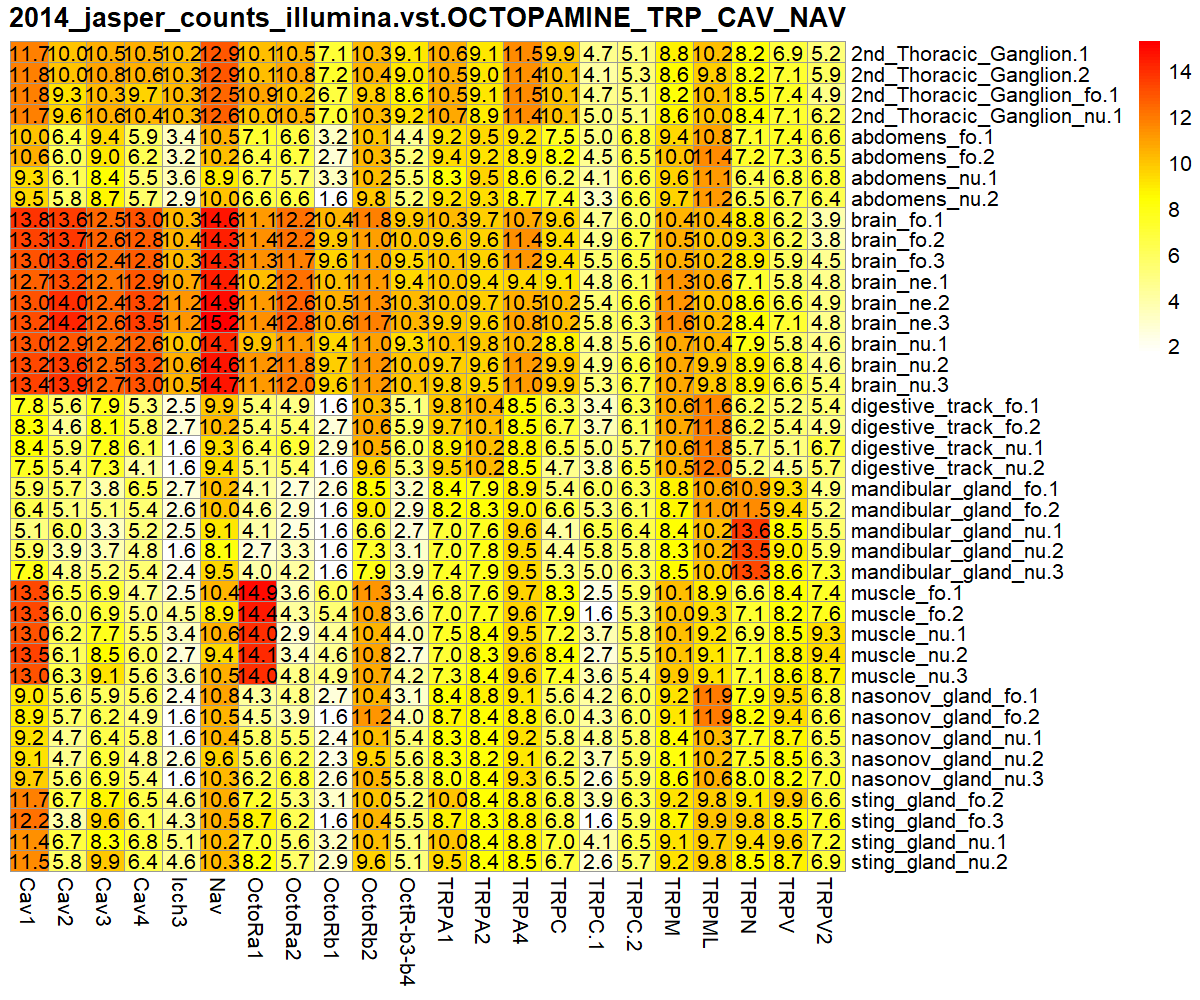

[1] "C:/Users/michel.boissac/Desktop/jupyter_notebook/OUTPUT/2014_jasper_counts_illumina_vst_OCTOPAMINE_TRP_CAV_NAV/2014_jasper_counts_illumina.vst.OCTOPAMINE_TRP_CAV_NAV.pheatmap.png"


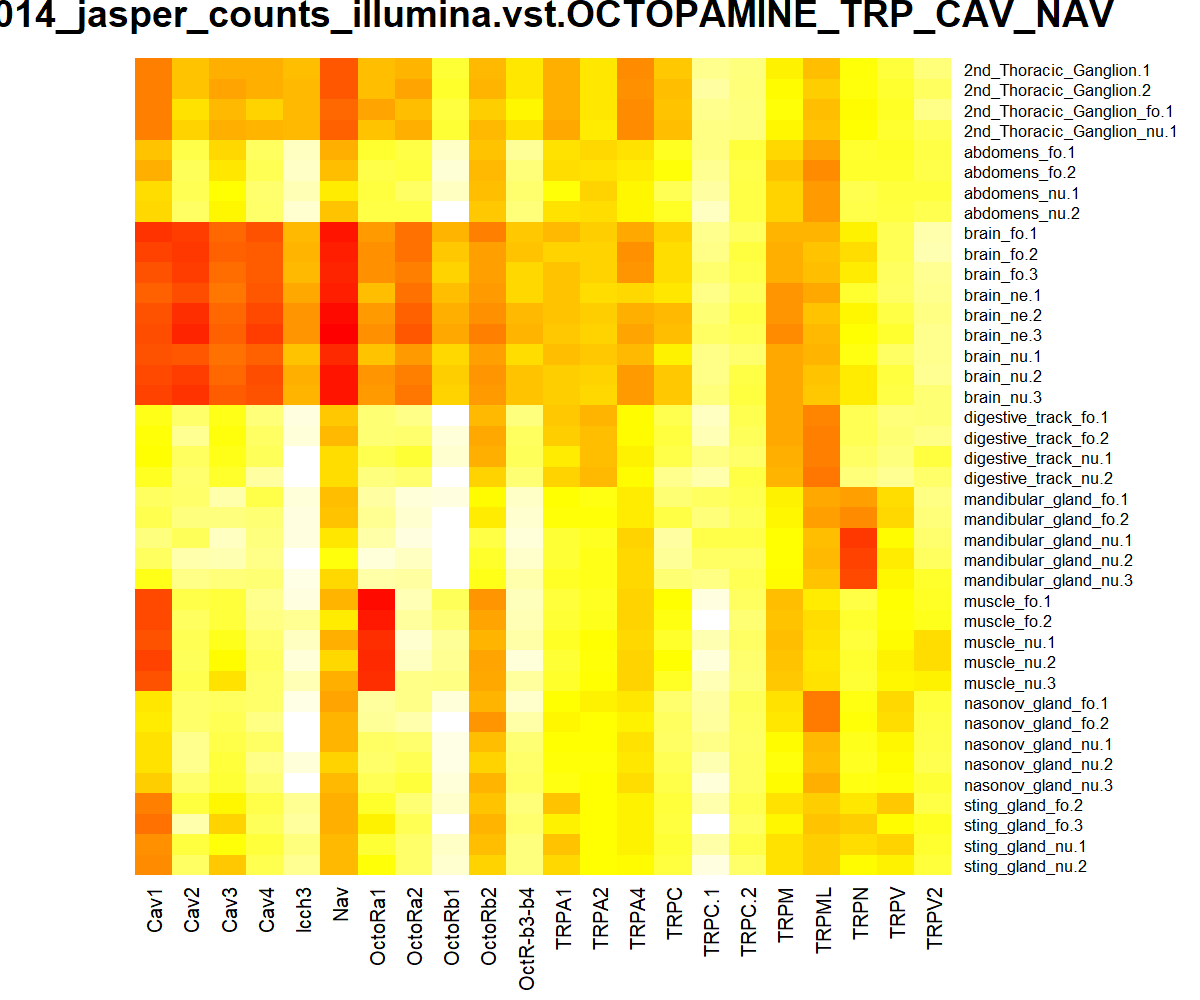

In [16]:
#PHEATMAP 

#trie la matrice par ordre alphabetique (colonnes et lignes) pour la visualisation heatmap
counts_norm_genes = counts_norm_genes[order(rownames(counts_norm_genes)), order(colnames(counts_norm_genes))] 
#pheatmap sur le sous tableau normalise avec nos genes
function_pheatmap(counts = counts_norm_genes,
                  plot_titre = paste0(nom_repertoire_output,".",normalisation,".",noms_genes),
                  filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".",noms_genes,".pheatmap.png"))


function_heatmap(counts = counts_norm_genes,
                 plot_titre = paste0(nom_repertoire_output,".",normalisation,".",noms_genes),
                 filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".",noms_genes,".heatmap.png"))


# profondeur de séquençage saturante

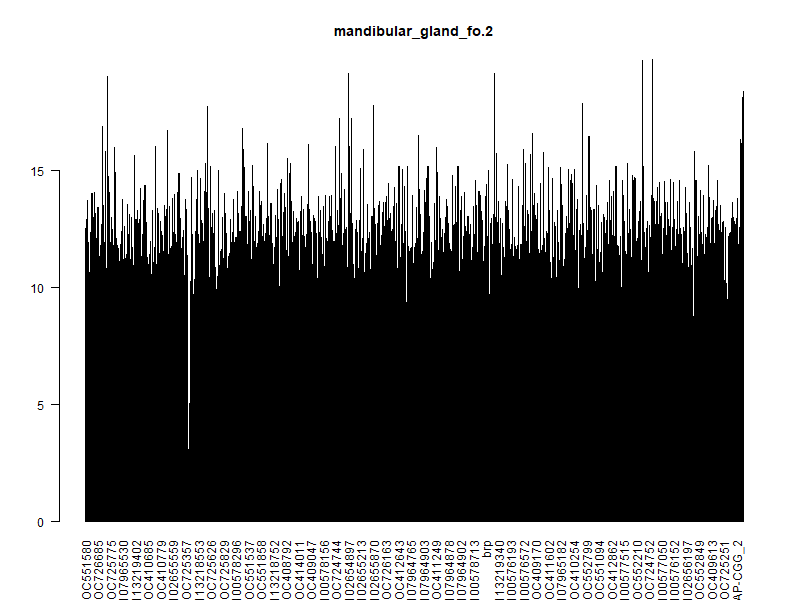

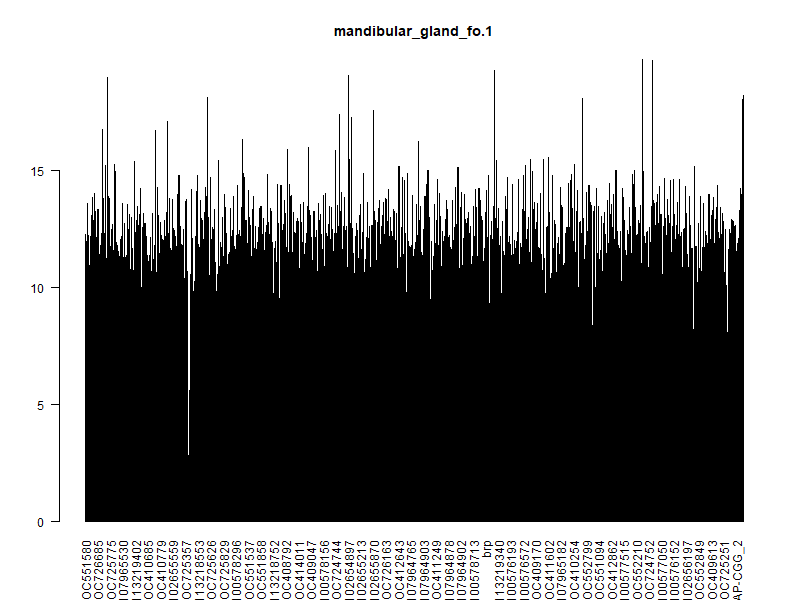

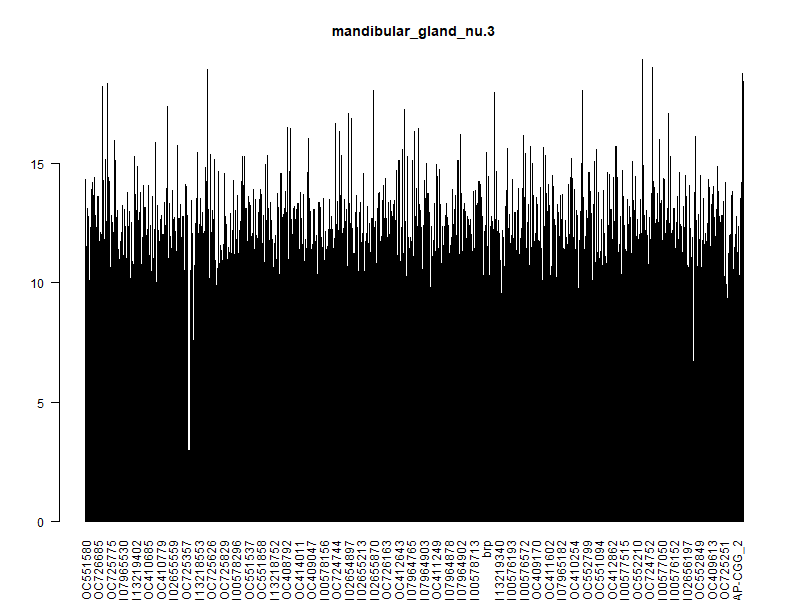

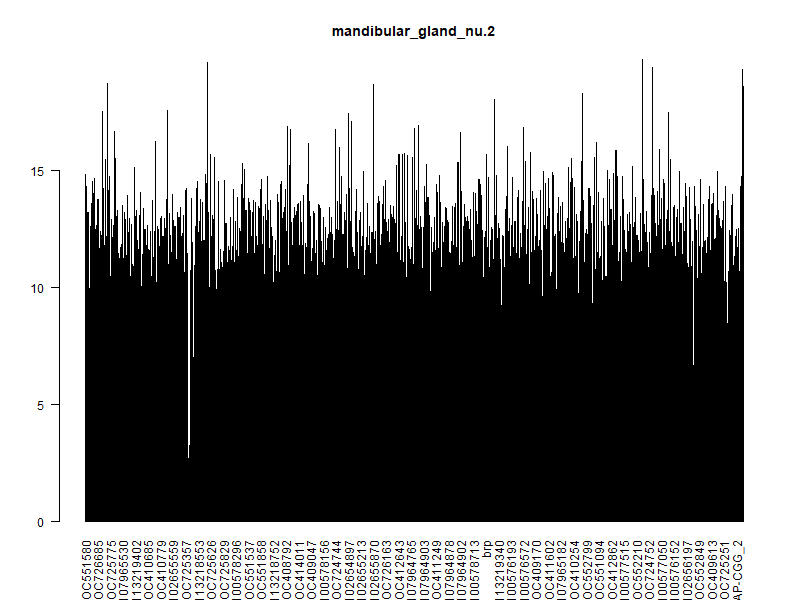

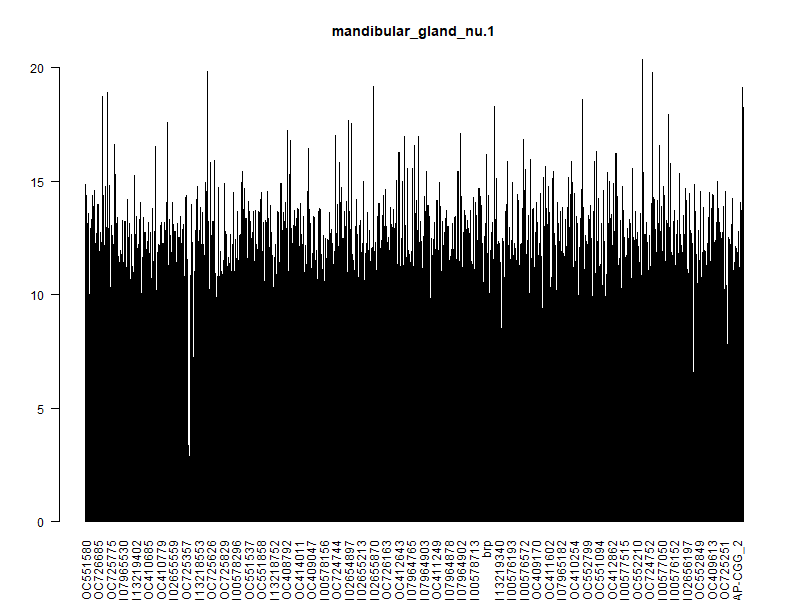

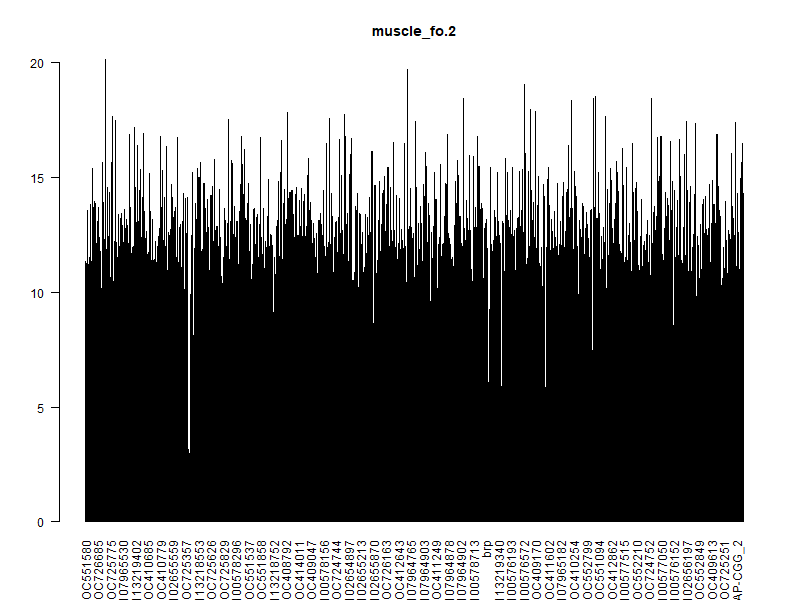

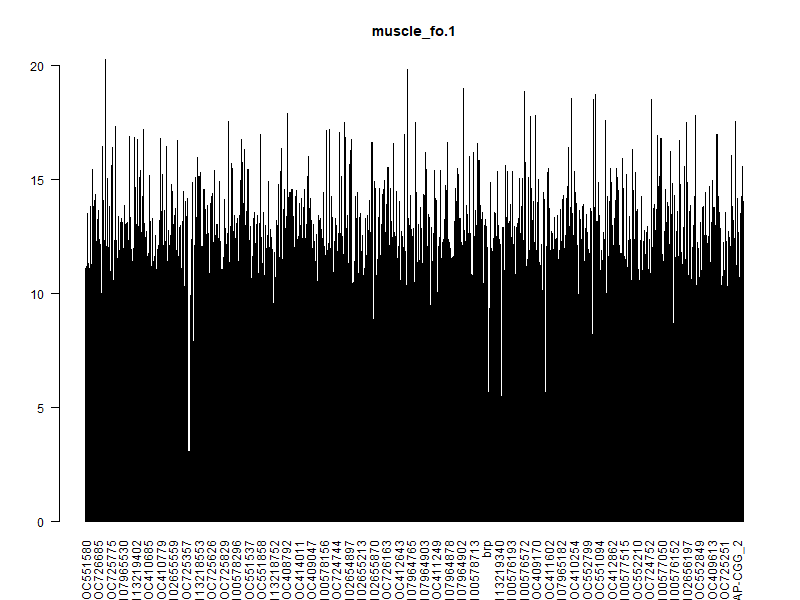

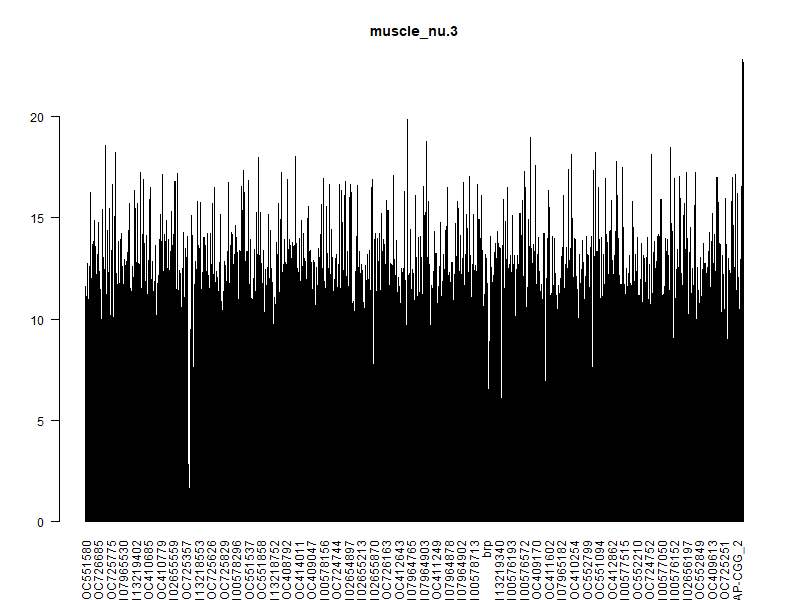

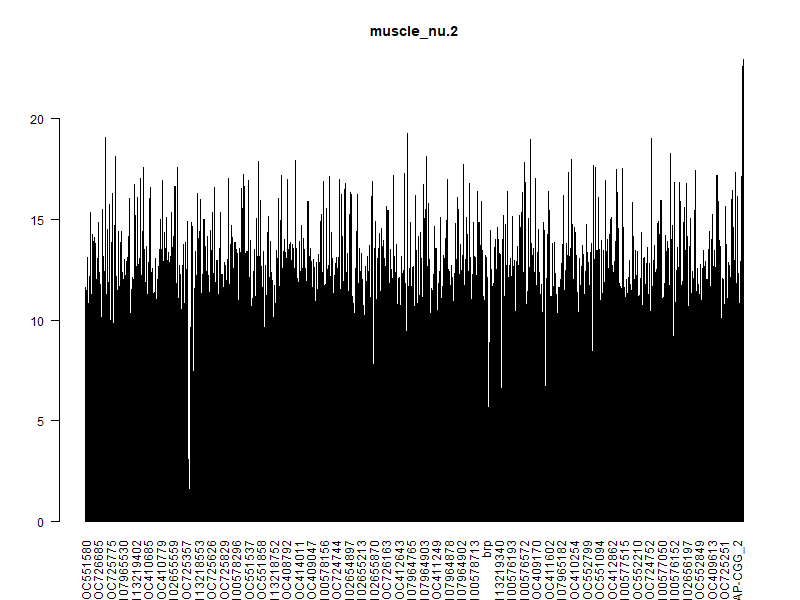

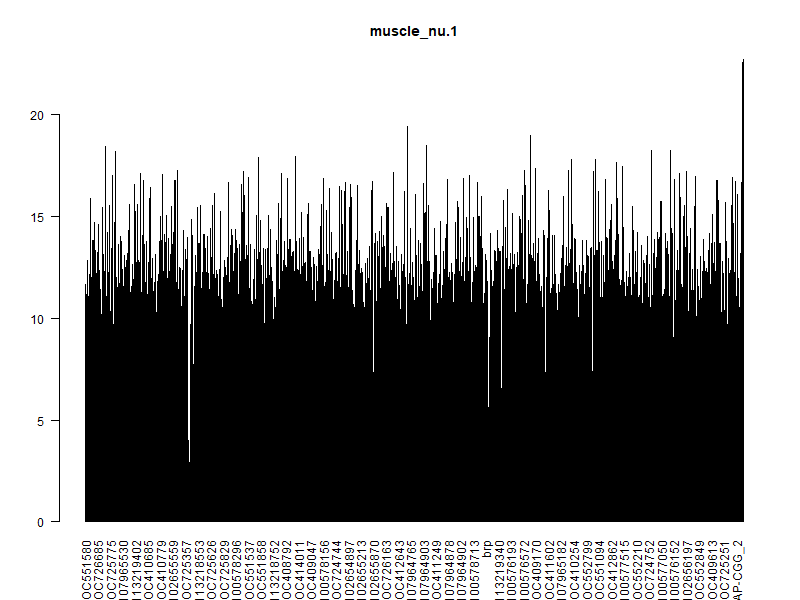

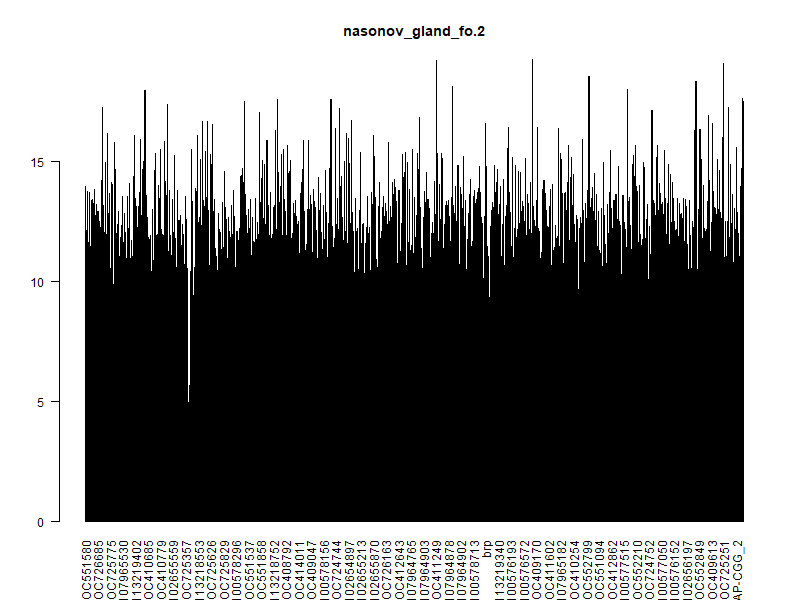

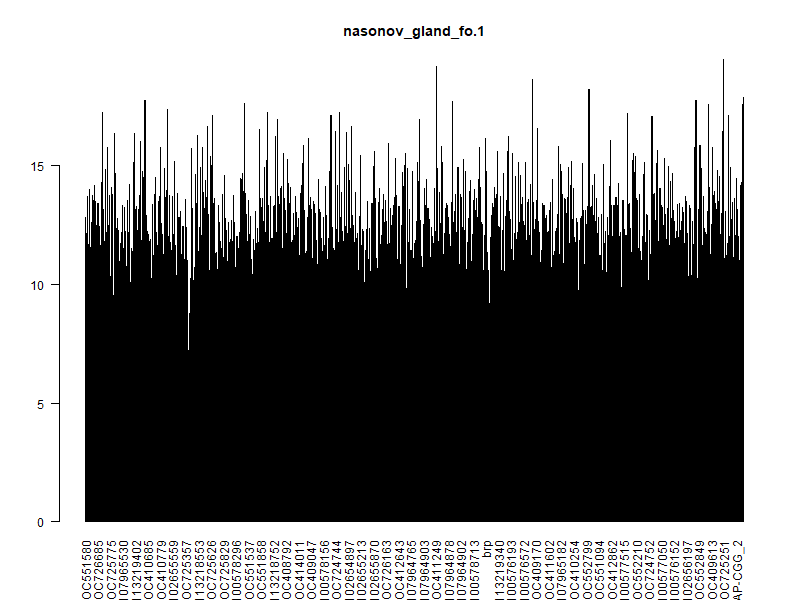

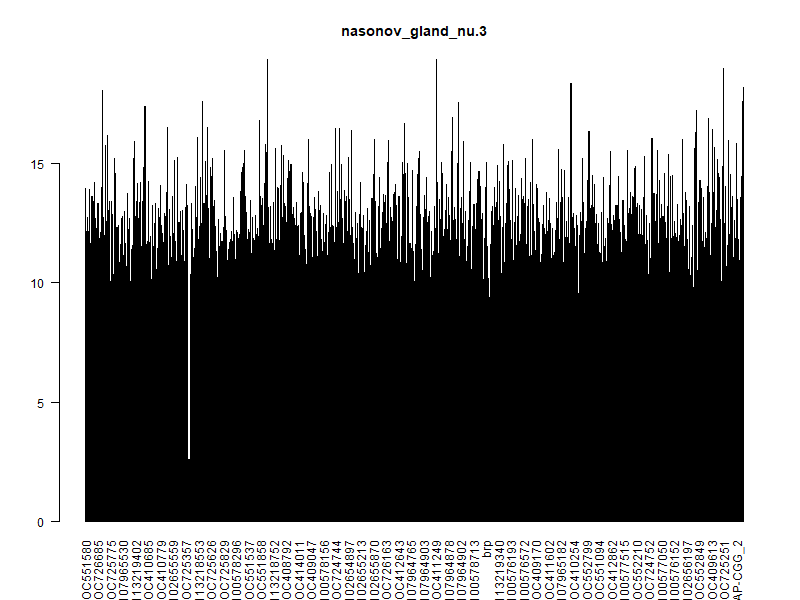

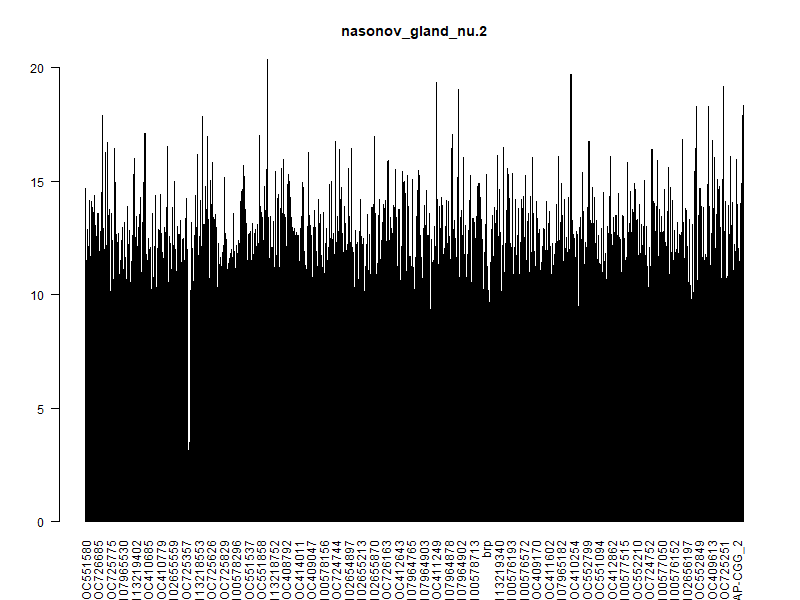

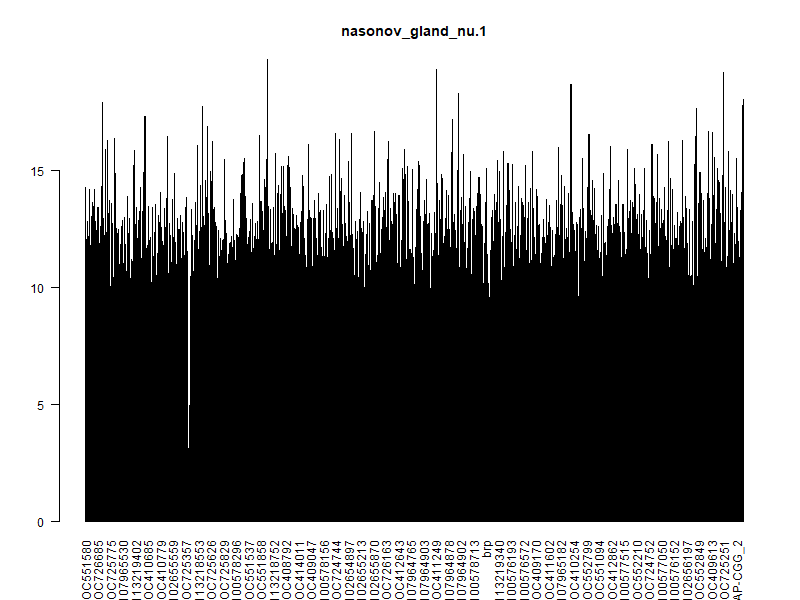

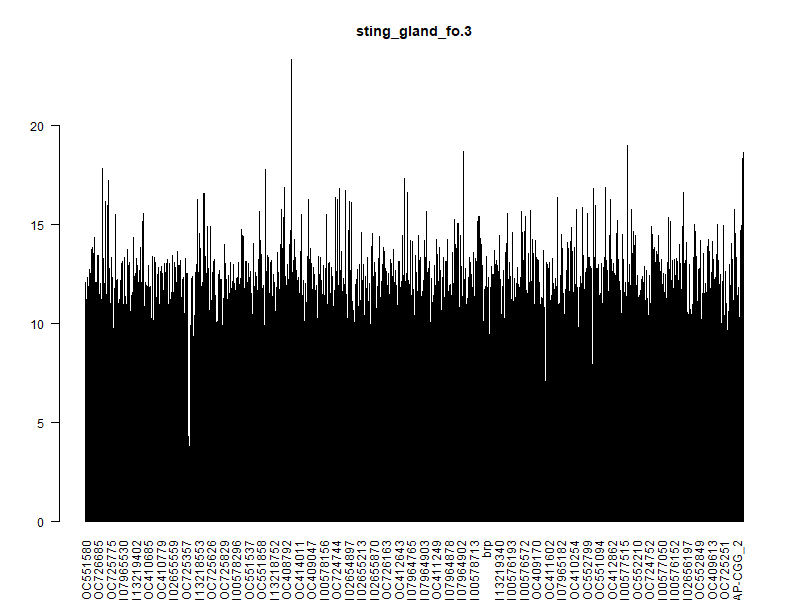

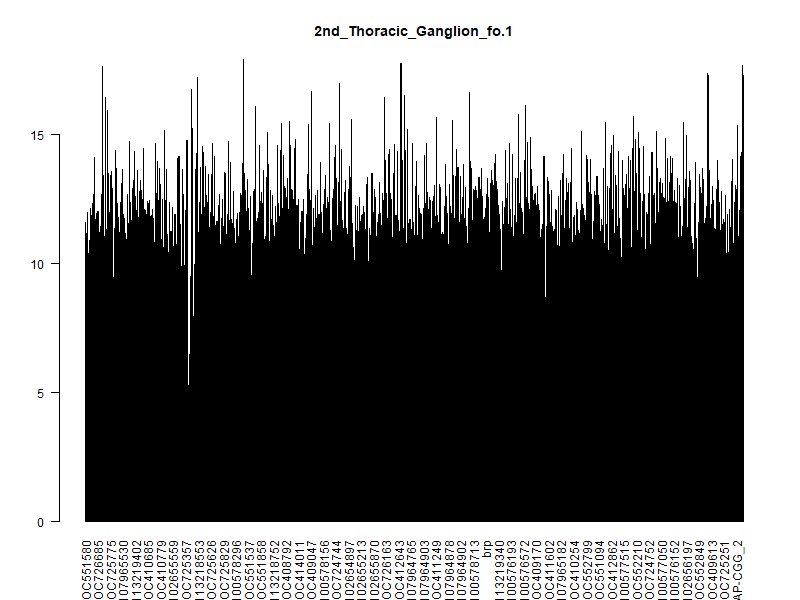

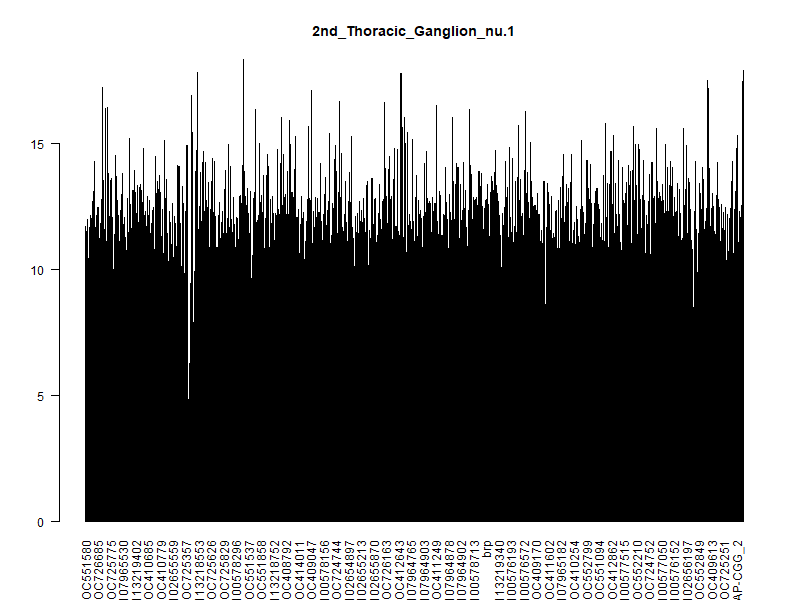

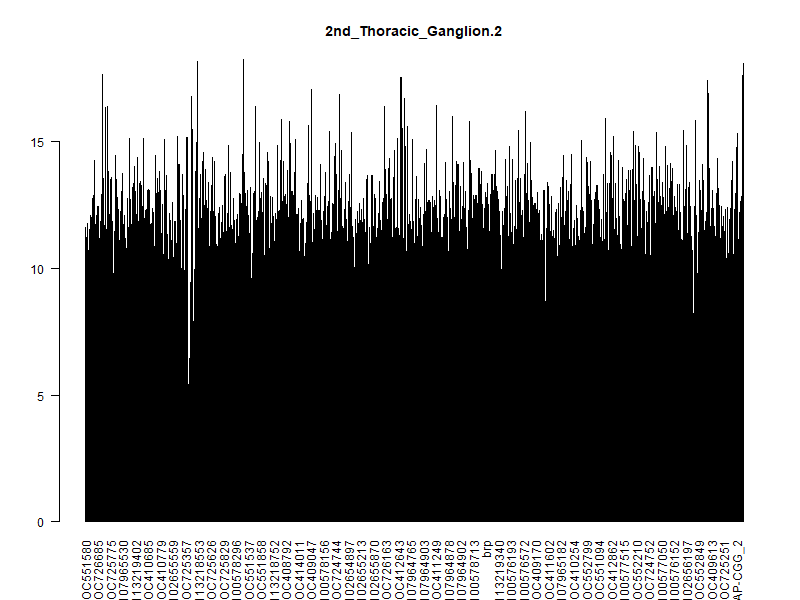

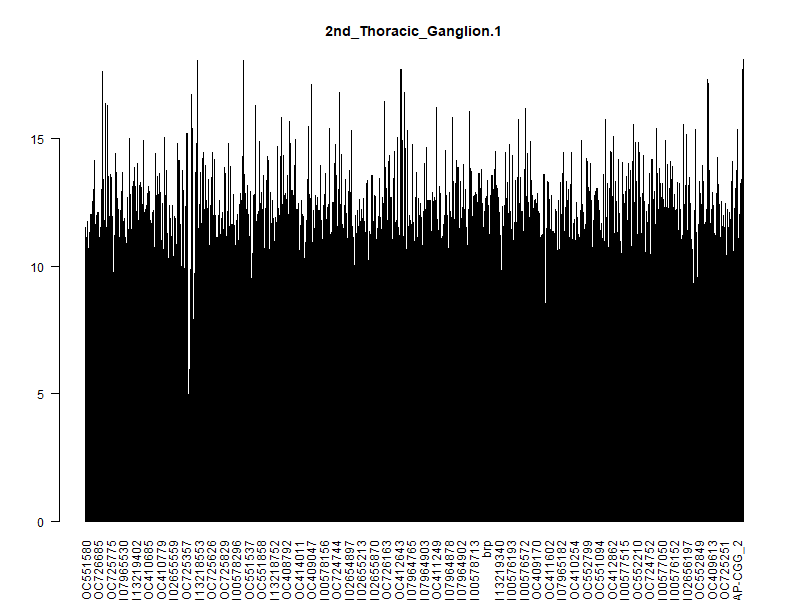

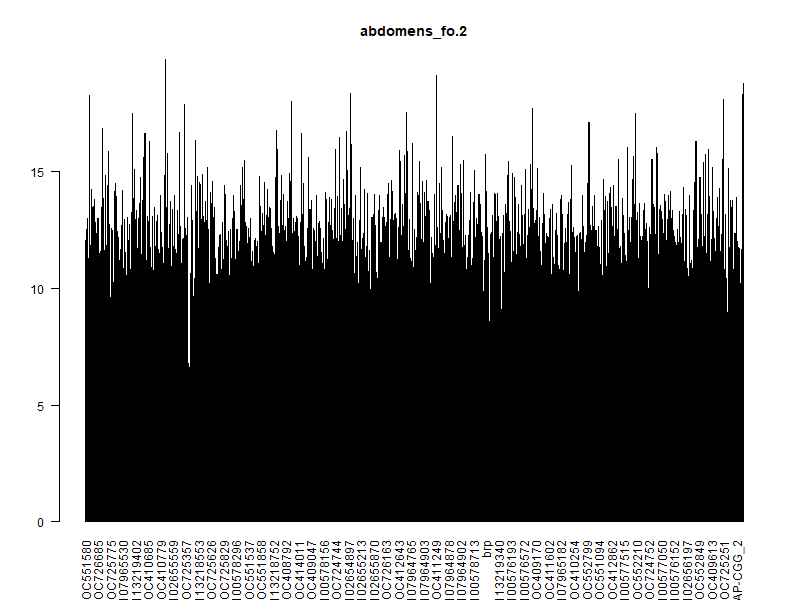

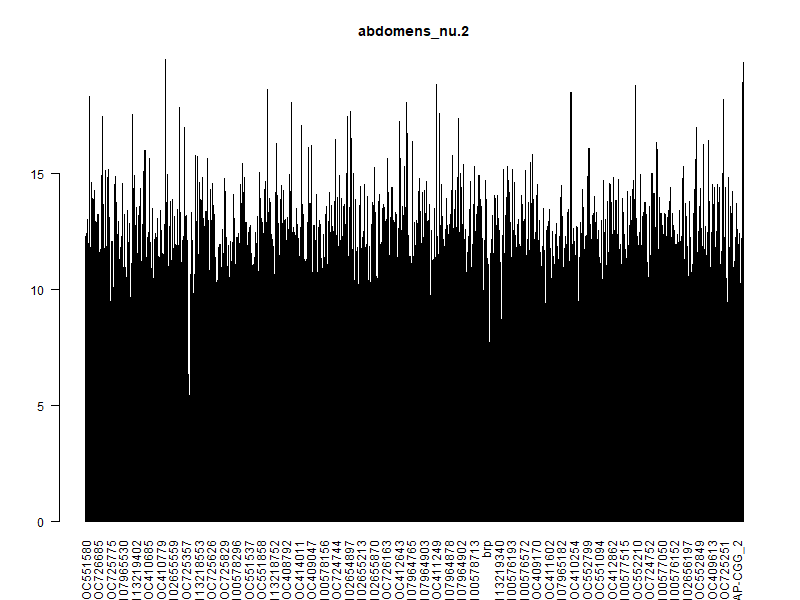

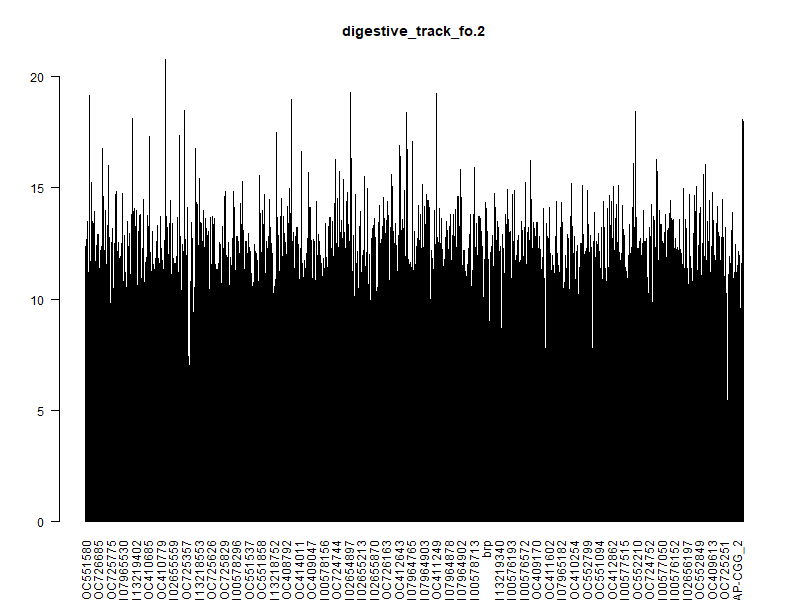

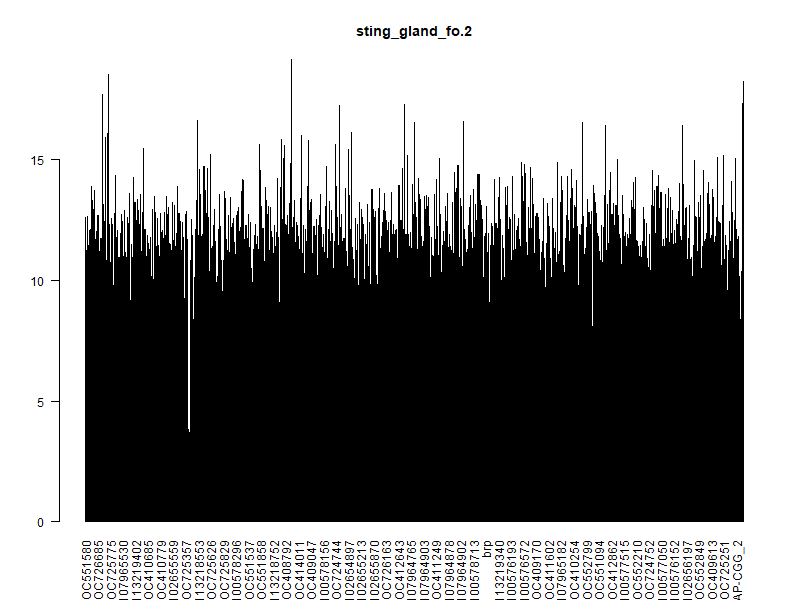

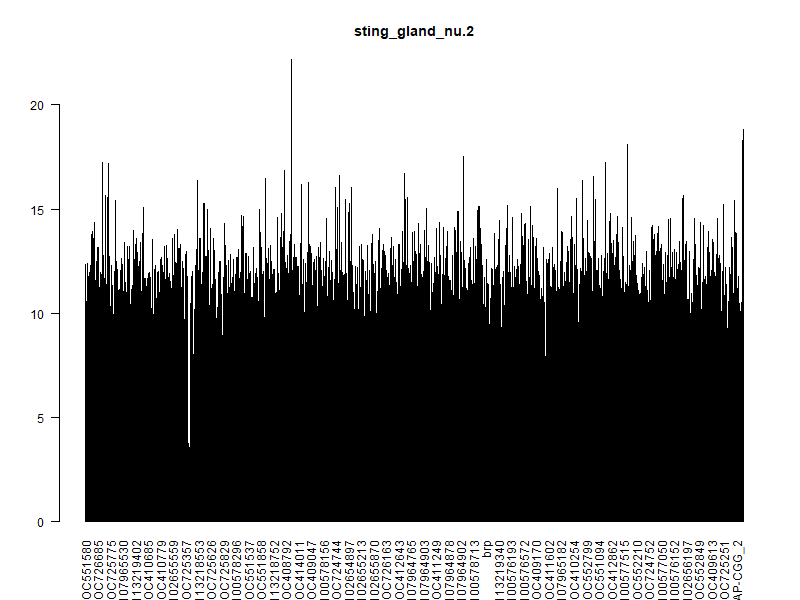

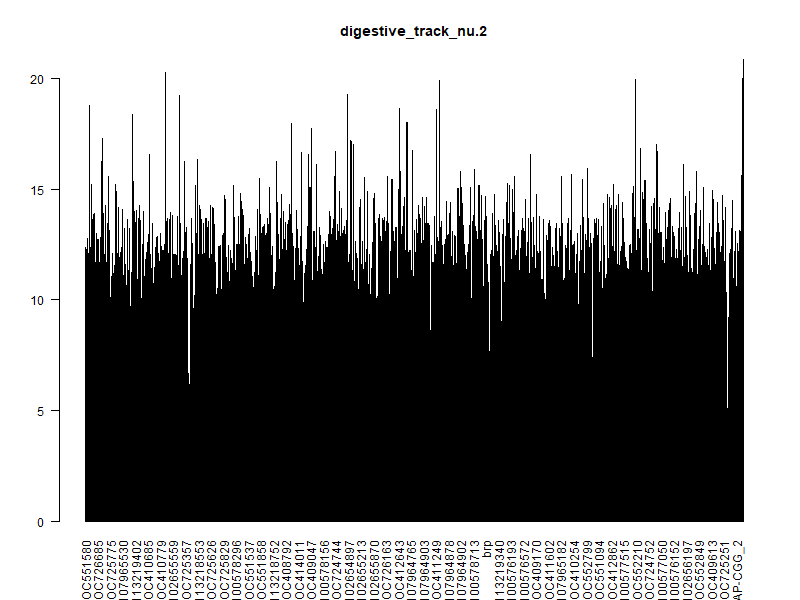

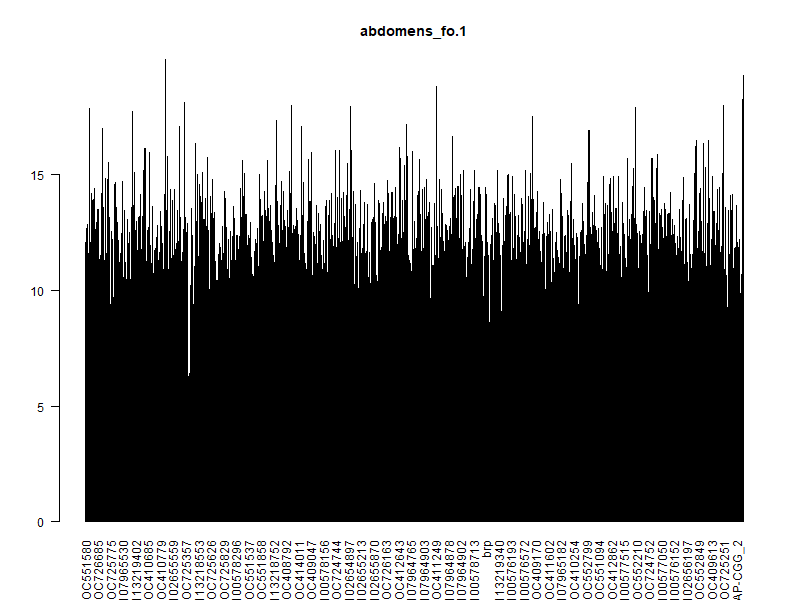

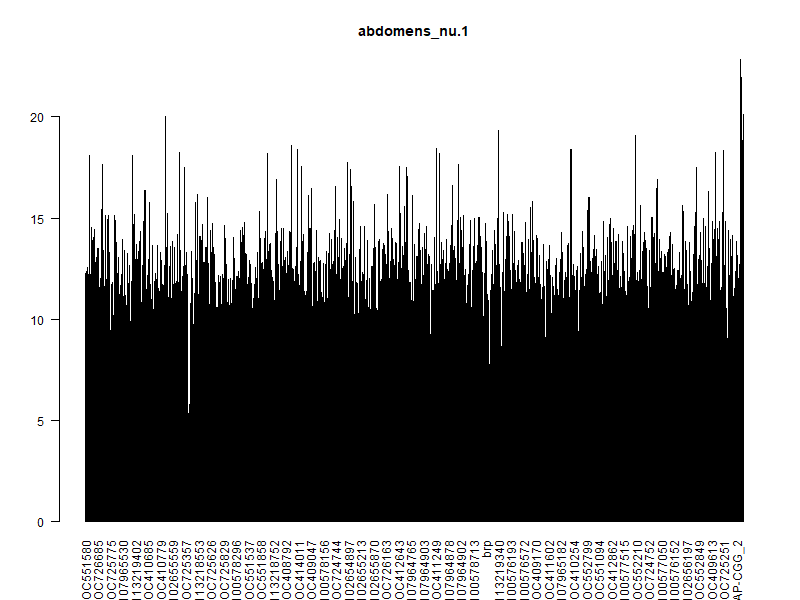

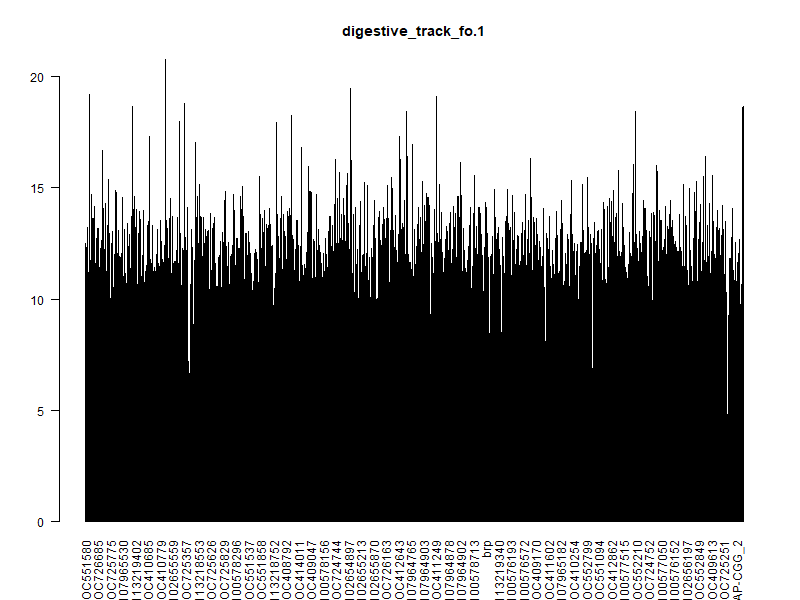

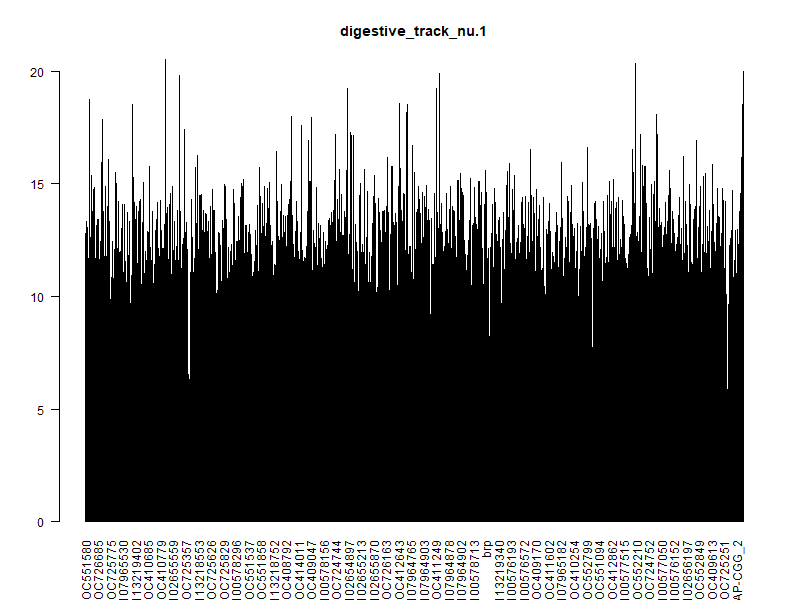

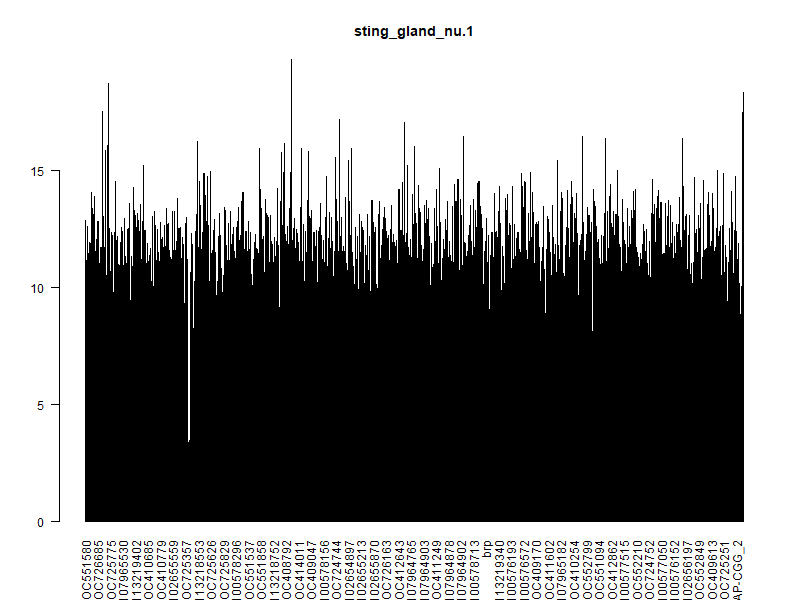

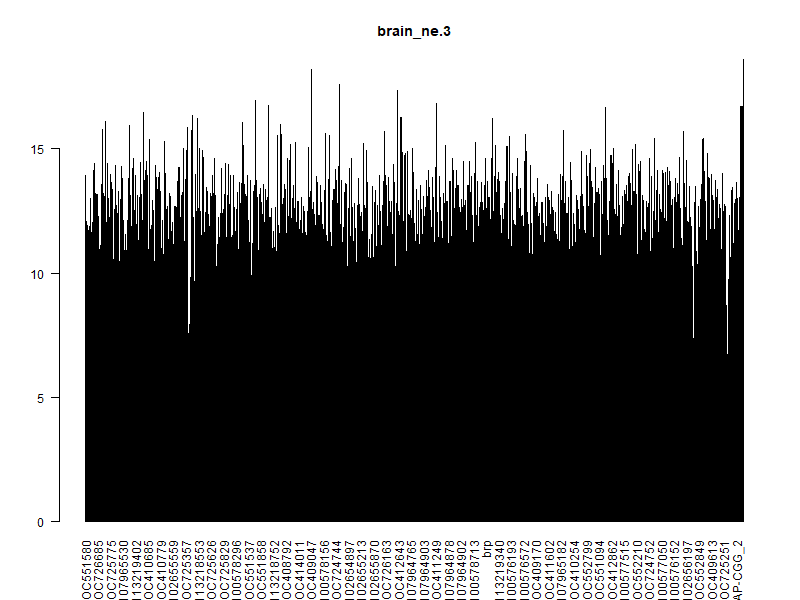

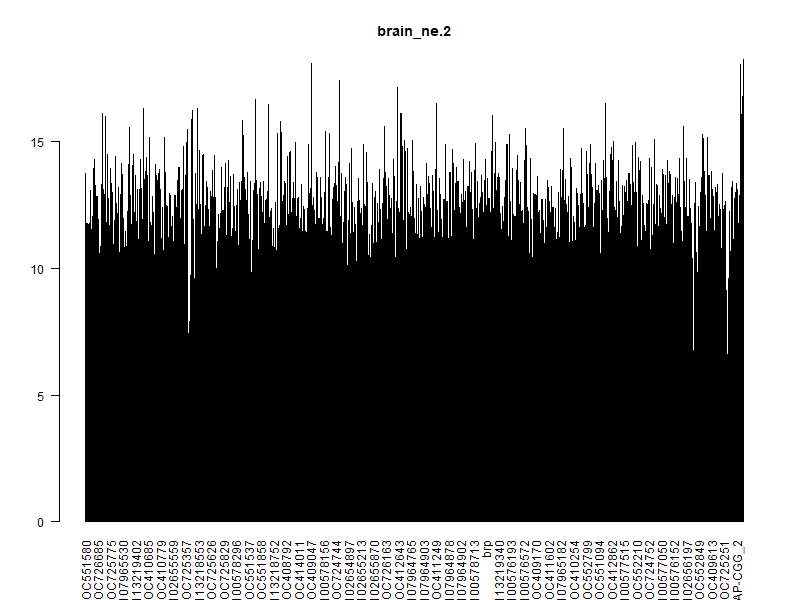

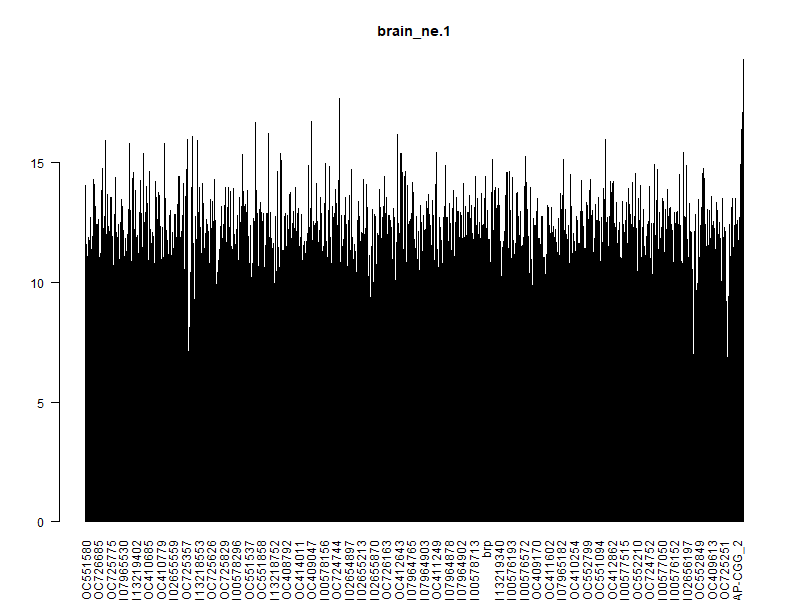

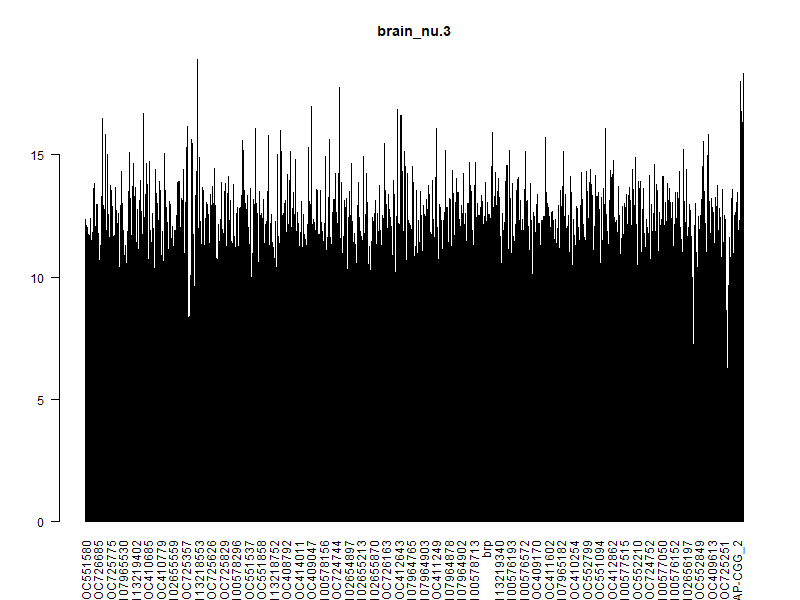

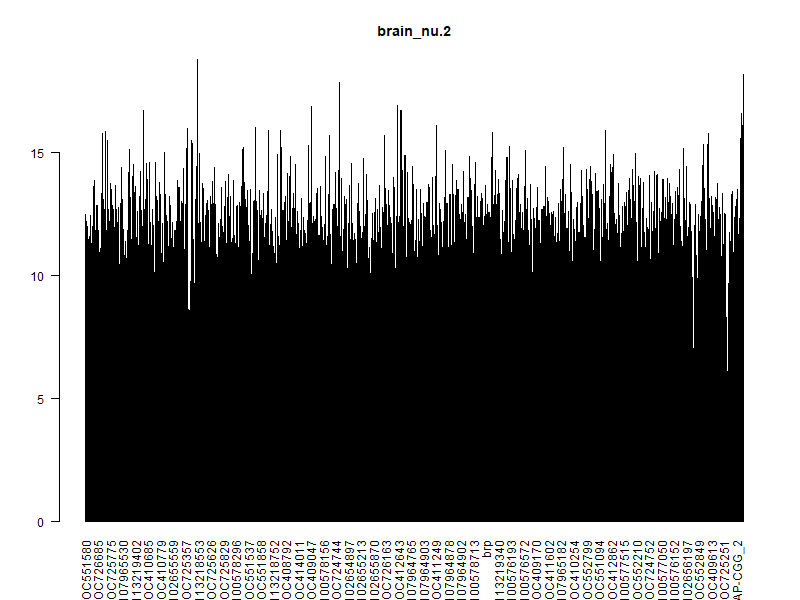

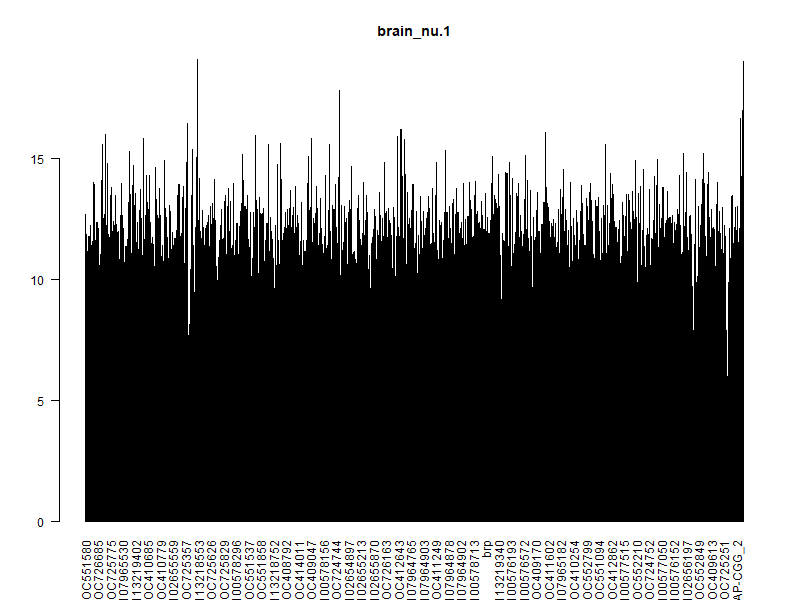

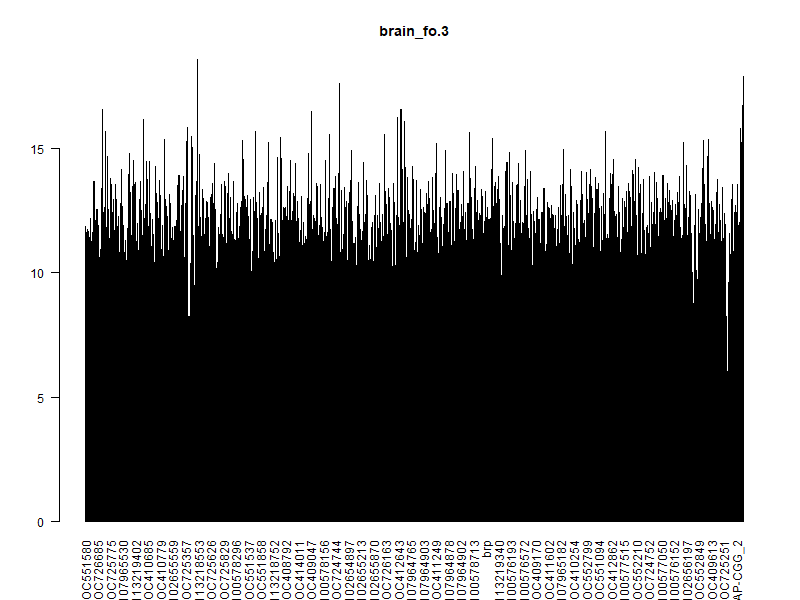

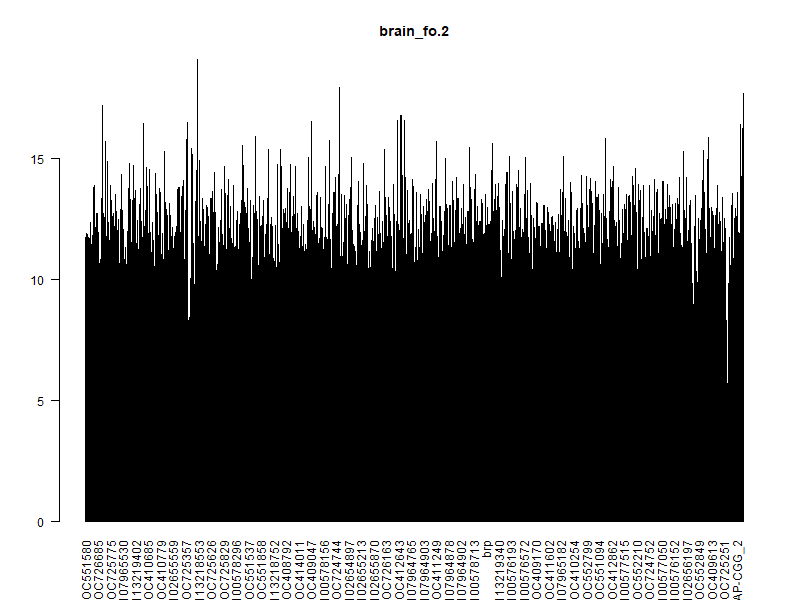

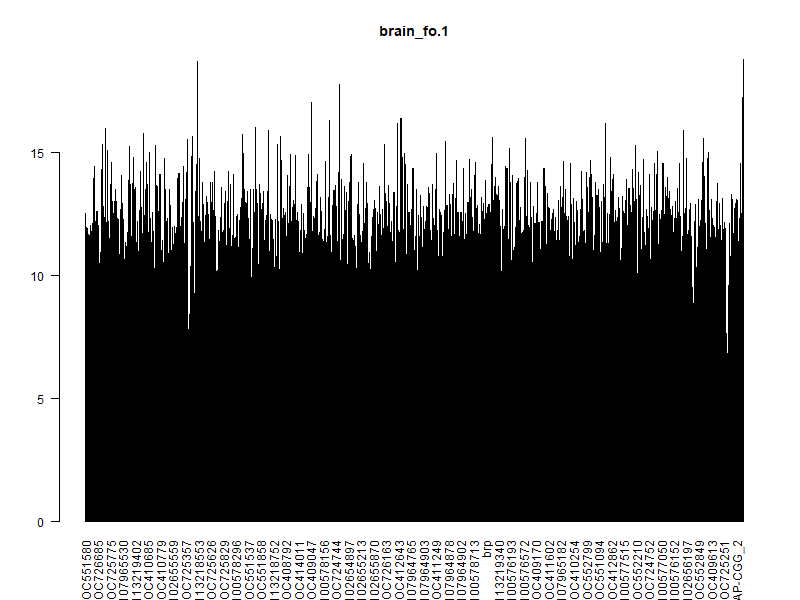

In [17]:
#QUALITE PROFONDEUR DE SEQUENCAGE
#creer des barplots non triés de l'expression du genome
dir.create(paste0(chemin_repertoire_output,"/barplot_genome_expression_",normalisation))
function_barplot_genome_expression(counts = counts_norm,
                                   filename = paste0(chemin_repertoire_output,"/barplot_genome_expression_",normalisation,"/",nom_repertoire_output,".",normalisation,"_barplot_genome_expression"))  


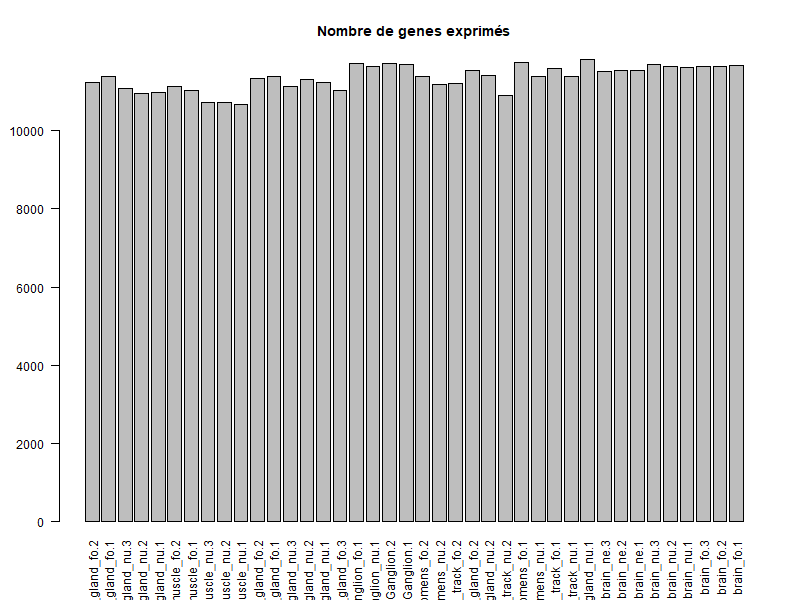

In [23]:
#nbr de genes exprimés par alignements (>0 reads/gene)
function_barplot_nbr_genes_expr(counts = counts,
                                filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,"_all_genes.barplot_nbr_genes_expr"))
  

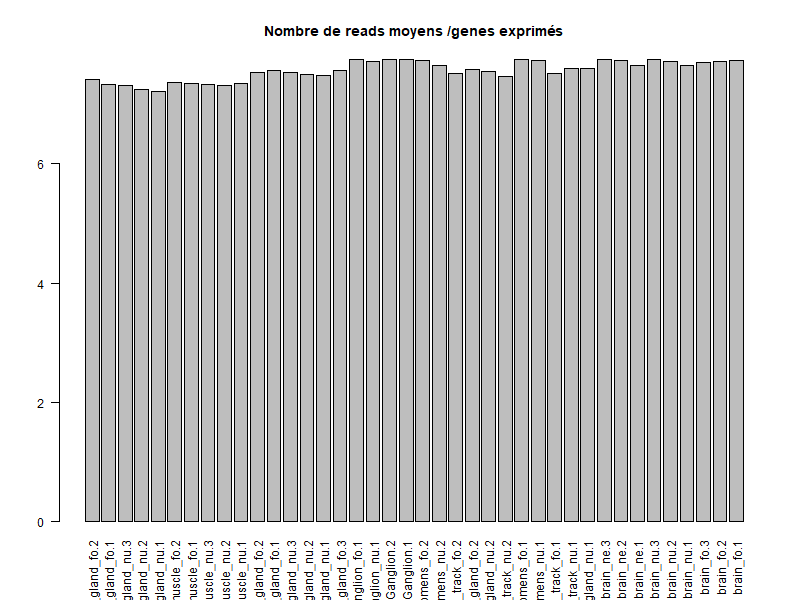

In [24]:
#nbr de reads moyen/gene exprimés (>0reads) 
function_barplot_nbr_reads_moyen_par_gene_exprime(counts = counts_norm,
                                                  filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_all_genes.barplot_nbr_reads_moyen_par_gene_exprime"))

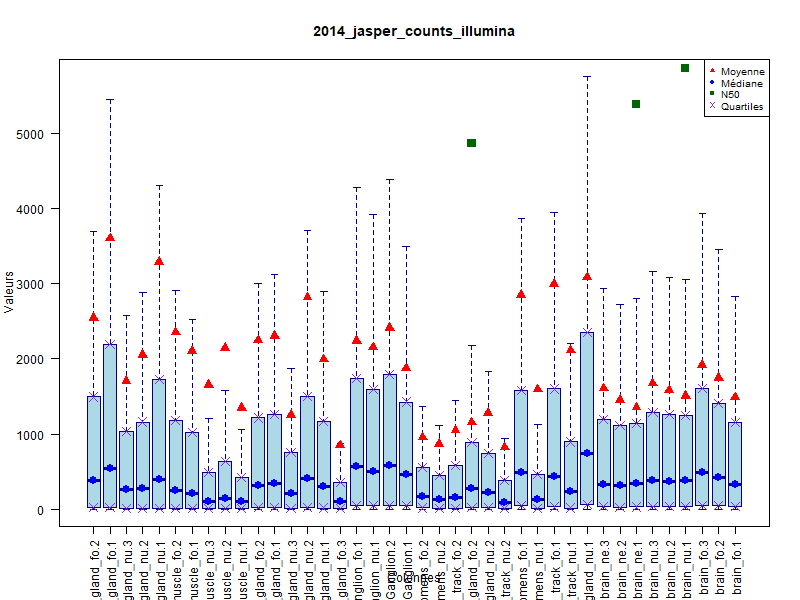

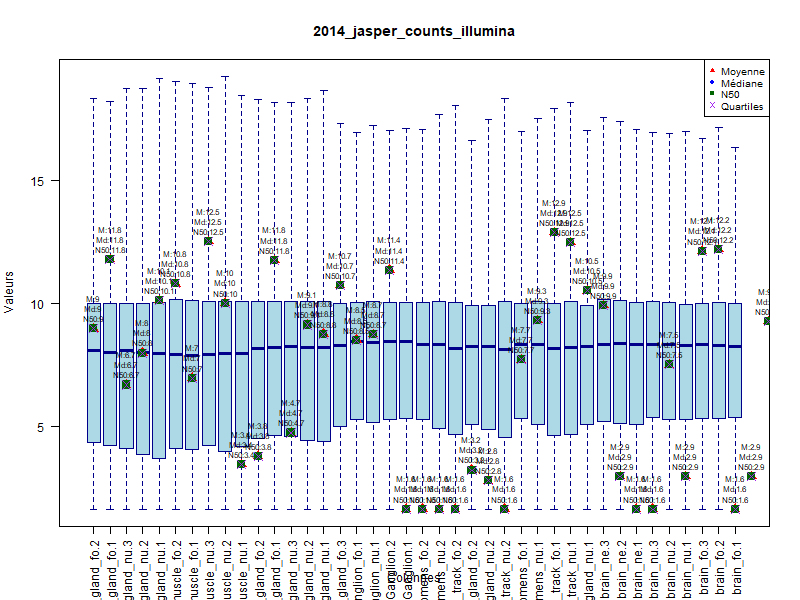

In [25]:
#BOXPLOT NBR READS 
function_boxplot_nbr_reads(counts,
                              plot_titre = nom_repertoire_output,
                              filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".boxplot_nbr_reads.png"))

function_boxplot_nbr_reads(counts_norm,
                              plot_titre = nom_repertoire_output,
                              filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".boxplot_nbr_reads.png"))


# Signature d'expression transcriptomique

Bootstrap (r = 0.5)... Done.
Bootstrap (r = 0.6)... Done.
Bootstrap (r = 0.7)... Done.
Bootstrap (r = 0.8)... Done.
Bootstrap (r = 0.9)... Done.
Bootstrap (r = 1.0)... Done.
Bootstrap (r = 1.1)... Done.
Bootstrap (r = 1.2)... Done.
Bootstrap (r = 1.3)... Done.
Bootstrap (r = 1.4)... Done.


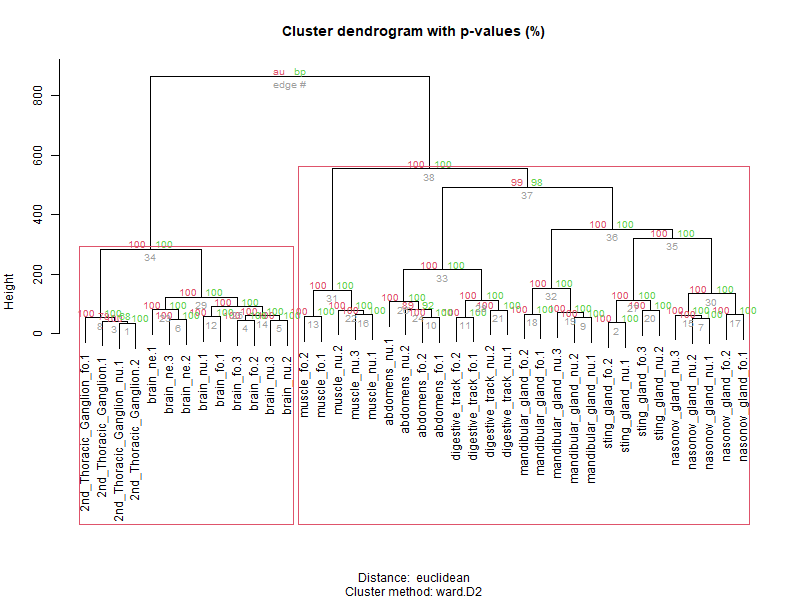

In [26]:
#clustering hierarchique bootstrap
function_cluster_hierarchique_bootsrap(counts = counts_norm,
                                       filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_all_genes.dendrogramme_bootsrap"))



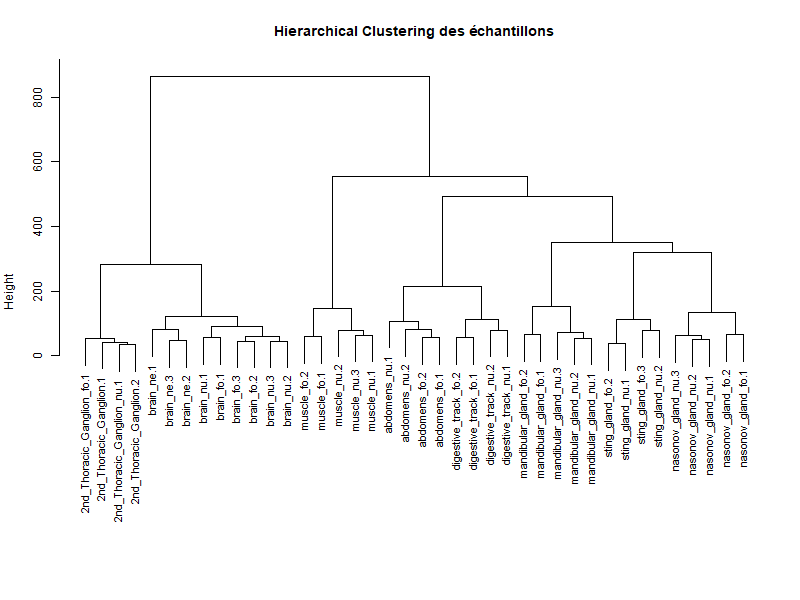

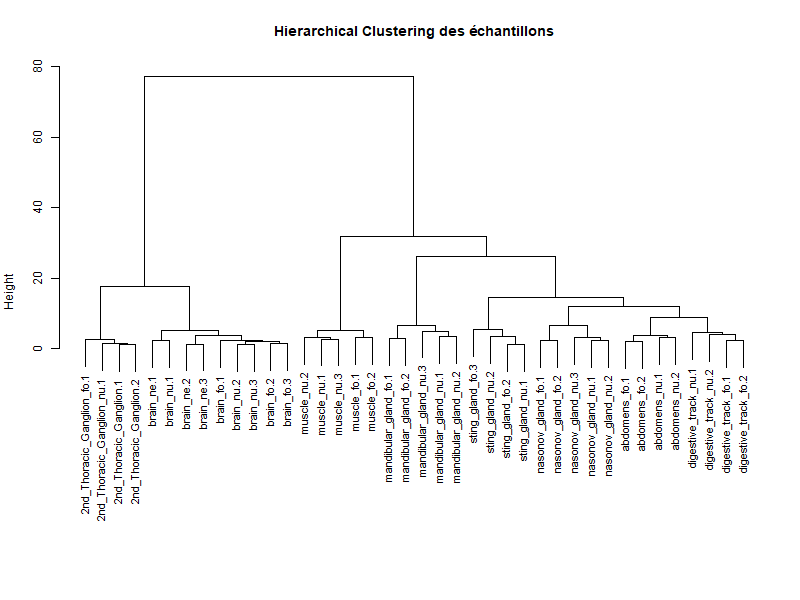

In [27]:
#clustering hierarchique
function_cluster_hierarchique(counts = counts_norm,filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_all_genes.dendrogramme"))
#clustering hierarchique
function_cluster_hierarchique(counts = counts_norm_genes,filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".",noms_genes,".dendrogramme"))

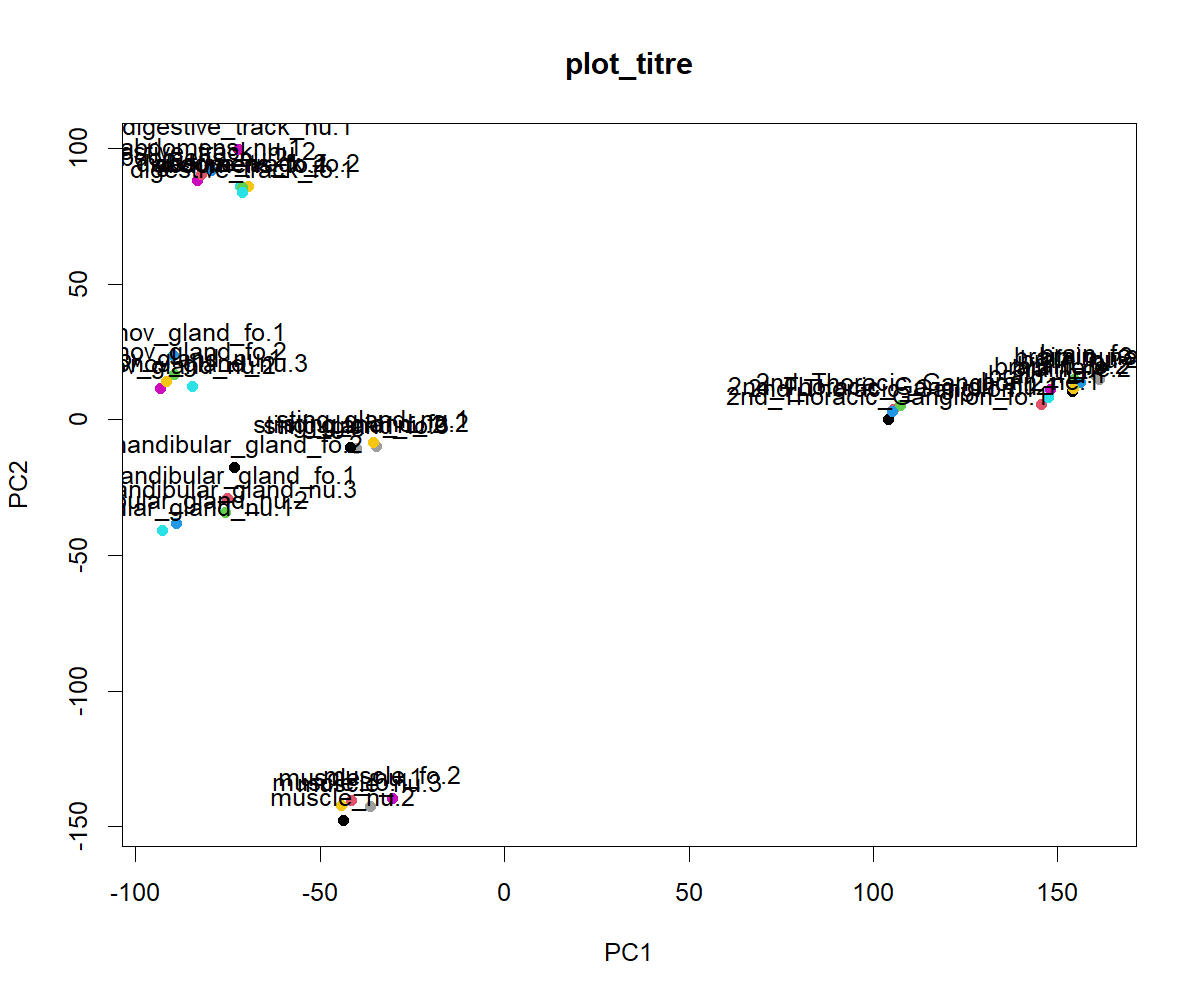

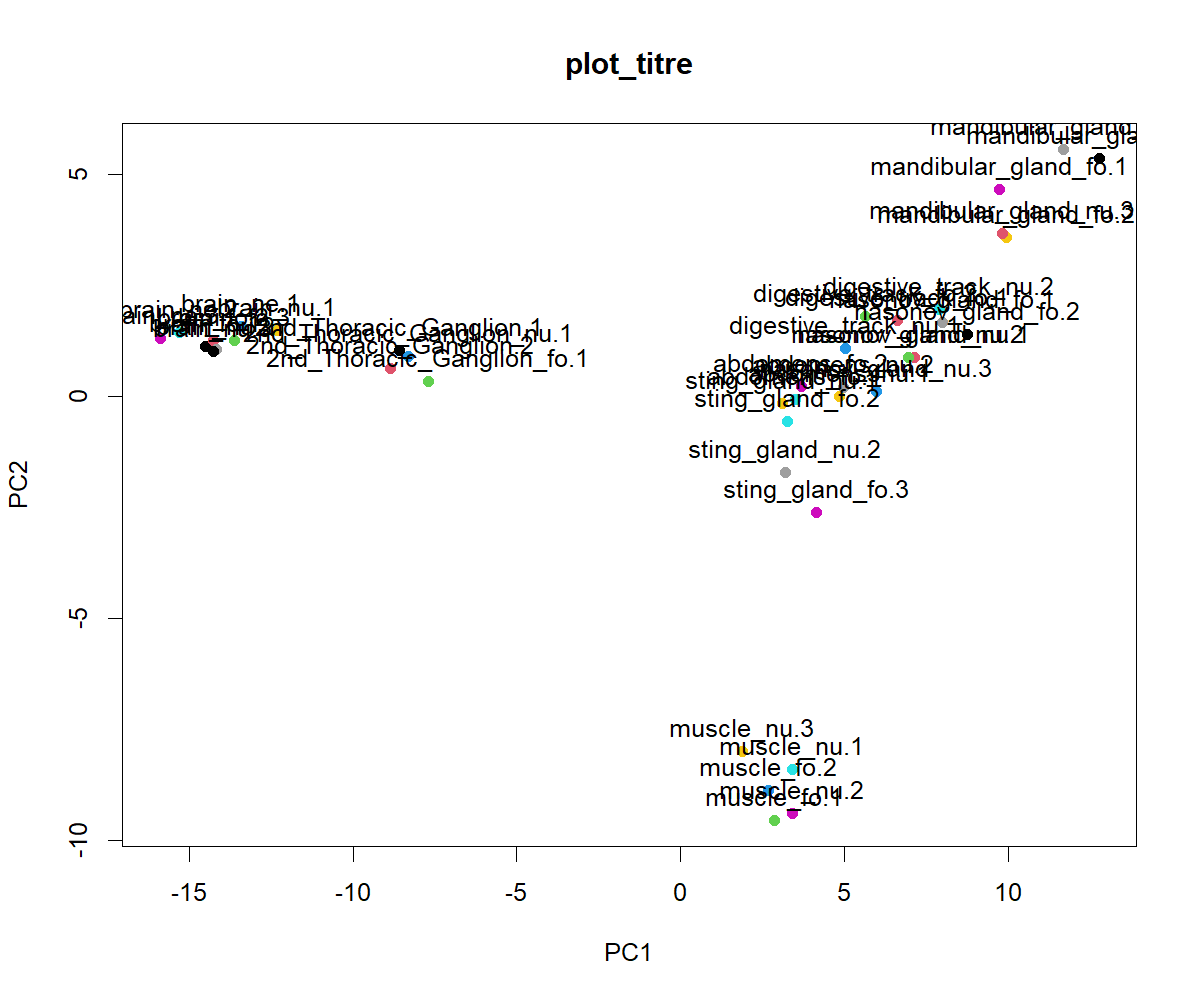

In [28]:
#ACP 2D
#ACP sur le tableau entiers normalise 
function_ACP(counts = counts_norm,plot_titre = paste0(nom_repertoire_output,".",normalisation,"_all_genes"), filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_all_genes.acp.png"))
#ACP sur le tableau genes normalise 
function_ACP(counts = counts_norm_genes,plot_titre = paste0(nom_repertoire_output,".",normalisation,"_all_genes"), filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".",noms_genes,".acp.png"))


In [33]:
#ACP 3D
function_3D_PCA(counts = counts_norm,filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_all_genes.acp3D.html"))

In [ ]:
#Diagramme de Venn des genes communs entre echantillons
function_genes_communs(counts)

# Correlation des niveaux d'expression des genes

In [ ]:
#CORRELATIONS 1gene vs 12000
chemin_tab_noms_genes = paste0(repertoire_fichiers_txt,"/",noms_genes,".txt")                            #repertoire_fichiers_txt
df_genes_names = read.table(chemin_tab_noms_genes, header=FALSE,  sep="\t", comment.char="#")
R2=0.99
function_CNN_genes(counts = counts_norm,df_genes_names = df_genes_names[[1]],
                   R2 = R2,
                   filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".",noms_genes,".",R2))
  

In [ ]:
#Matrice de correlation des niveaux d'expression des genes d'interets
function_matrice_correlation(counts = counts_norm_genes,plot_titre = paste0(nom_repertoire_output,".",normalisation,".",noms_genes),filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".",noms_genes,".correlation.png"))
  #
function_matrice_correlation_courbes(counts = counts_norm_genes,plot_titre = paste0(nom_repertoire_output,".",normalisation,".",noms_genes),filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,".",noms_genes,".correlation_courbes.png"))


In [ ]:
#graphe de correlation des niveaux d'expression des genes d'interets
function_CNN(counts = counts_norm_genes,R2= 0.5,filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_CNN"))

function_CNN(counts = counts_norm_genes,R2= 0.6,filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_CNN"))

function_CNN(counts = counts_norm_genes,R2= 0.7,filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_CNN"))

function_CNN(counts = counts_norm_genes,R2= 0.8,filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_CNN"))

function_CNN(counts = counts_norm_genes,R2= 0.9,filename = paste0(chemin_repertoire_output,"/",nom_repertoire_output,".",normalisation,"_CNN"))

 